# What sells a car?

You're an analyst at Crankshaft List. Hundreds of free advertisements for vehicles are published on your site every day. You need to study data collected over the last few years and determine which factors influence the price of a vehicle.

The purpose of this project is to examine a data set of online car sales to determine which factors influence the price of a vehicle. We will need to check for missing values, manipulate our data set into a form that is suitable for the purpose we are seeking, and then get visualizations of the data to perform our analysis. We also may need to remove outliers, and if we perform analysis on a data set that does possess outliers, we should consider what sort of impact the outliers have.

## Initialization

In [1]:
# Loading all the libraries

import pandas as pd
import matplotlib.pyplot as plt

### Load data

When loading the data, we will create two tables, one of which, og_data, will remain untouched in case we need to reference the original data frame. Data, however, will be constantly updated throughout the process.

In [2]:
# Load the data file into a DataFrame

og_data = pd.read_csv('/datasets/vehicles_us.csv')
data = pd.read_csv('/datasets/vehicles_us.csv')

### Explore initial data

The dataset contains the following fields:
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gas, diesel, etc.
- `odometer` — the vehicle's mileage when the ad was published
- `transmission`
- `paint_color`
- `is_4wd` — whether the vehicle has 4-wheel drive (Boolean type)
- `date_posted` — the date the ad was published
- `days_listed` — from publication to removal

In [3]:
# print the general/summary information about the DataFrame

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
price           51525 non-null int64
model_year      47906 non-null float64
model           51525 non-null object
condition       51525 non-null object
cylinders       46265 non-null float64
fuel            51525 non-null object
odometer        43633 non-null float64
transmission    51525 non-null object
type            51525 non-null object
paint_color     42258 non-null object
is_4wd          25572 non-null float64
date_posted     51525 non-null object
days_listed     51525 non-null int64
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [4]:
# print a sample of data

data.head(25)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


At an initial look at our data set, it appears that the data, where present, is rather clean. The entries appear to be named rather consistently, and the numbers do not seem to be unfeasible. There are missing values in five columns: model_year, cylinders, odometer, paint_color, and is_4wd. They very clearly are not aligned, as even in the sample we looked at we can see that each column's missing entries are likely caused due to random error.

The is_4wd has approximately half of the data points missing, and of the first 25 rows of the data set, there is not a single instance of boolean "0" (signifying the car is not 4-wheel drive). This almost certainly means that all of the missing entries are meant to be the boolean resulting in False and should simply be replaced with 0.

We also see in the information column that the date_posted column is an object, not a date, so that will need to be amended.

Additionally, model_year is a float rather than an integer, which is a bit odd if we are only interested in the year, but if the month is also accounted for in the column then perhaps it makes sense.

In [5]:
data.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


The descriptive statistics here appear mostly normal. The mean values and median values tend to be rather close to one another.

There is an odd case in the price column in that the minimum price listed is 1, which is significantly lower than all the other price values and is more likely to be an error than an outlier. We were not told what the scale of price was, so if it is "price in tens of thousands of dollars" then that may not be strange, but that would also make the maximum price of 375,000 strange (or more strange than it appears to be - a \\$375,000 car is almost unusually expensive).

The model_year also shows that the minimum year is 1908. A vehicle from 1908 is rare, and not going to be sold based on its performance, color, mileage, etc. but rather for the historical value. If we have a good amount of vintage cars, then perhaps we could judge their values independently. Be that as it may, it seems irrelevant to the scope of this analysis and, as such, we should probably remove cars that are sufficiently old from our data set.

### Conclusions and further steps

We have identified a few clear requirements on what to do with our data at this point that will be good starting points for cleaning the data before analysis. We need to fill the is_4wd column with 0 values, and then check the other columns with missing values (model_year, cylinders, odometer, paint_color) to address problems they might have.

We then should change the 'date' column to a datetime object, remove vintage cars from our data set (based on IQR, we could judge outliers - cars that are older than 2001 - as 'vintage' or we could set a specific date), and get a look at the price column for outliers.

There is more to be done, but these tasks are ones that are clear, for now.

## Treat missing values (if any)

**Missing values in 'is_4wd'**

First we will check our is_4wd column to see if there are any odd entries, and fill them with 0 where null.

In [6]:
data['is_4wd'].value_counts()

1.0    25572
Name: is_4wd, dtype: int64

In [7]:
data['is_4wd'] = data['is_4wd'].fillna(0)
data['is_4wd'].value_counts()

0.0    25953
1.0    25572
Name: is_4wd, dtype: int64

**Missing values in 'paint_color':**

Next, we will look at the paint_color column, which is missing 17.9854% of its entries. Most likely, this is one that will be rather difficult to make a guess on. While some car colors are more popular than others, it is ultimately a rather arbitrary aspect of a car, so it should not have a significant impact on price.

A pivot table would probably be a good choice here, as some models may only come in certain colors. However, we have an incredibly high amount of different car models, so simply counting the paint colors on aggregate should be sufficient.

In [8]:
# check count of different paint colors

data['paint_color'].value_counts()

white     10029
black      7692
silver     6244
grey       5037
blue       4475
red        4421
green      1396
brown      1223
custom     1153
yellow      255
orange      231
purple      102
Name: paint_color, dtype: int64

White and black paint jobs are the most popular of our observed values, with grey, blue, and red also being fairly common. There is a little too much randomness in trying to determine a pattern, and paint is something that can always be reapplied - it is unlikely to have a significant impact on a car's price.

Even so, that statement cannot be made definitively, and weighing 18% of our data with practically blind guesses is not an ideal solution. Rather, the data should probably be simply filled with 'unknown'.

In [9]:
# update paint colors with missing values to 'unknown'

data['paint_color'] = data['paint_color'].fillna('unknown')
data['paint_color'].value_counts()

white      10029
unknown     9267
black       7692
silver      6244
grey        5037
blue        4475
red         4421
green       1396
brown       1223
custom      1153
yellow       255
orange       231
purple       102
Name: paint_color, dtype: int64

**Missing values in 'model_year'**

Since it likely is important for the 'odometer' value, finding the missing values in the model years should be completed first. The exact process to do so will likely be something we can estimate by checking the model name. Most car models should not be on the market for extended periods of time, so we could use the exact product as a good way of estimating the year it was made.

In [10]:
# check pivot table for unique model/year combinations

data.pivot_table(index=['model', 'model_year'], values = 'price', margins=False)

price
model             model_year              
acura tl          1999.0       2365.000000
                  2001.0       2674.000000
                  2002.0       1650.000000
                  2003.0       3658.100000
                  2004.0       3574.687500
...                                    ...
volkswagen passat 2014.0      10247.522727
                  2015.0      11406.923077
                  2016.0      11465.600000
                  2017.0      13734.900000
                  2018.0      14500.000000

[2226 rows x 1 columns]

Having 2226 rows may appear to do poorly at solving our problem, but it works out rather well. That means our data set of 51525 observations has only 2226 unique combinations of 'model' and 'model_year'. This does not necessarily mean that we can fill out our entire data set based on observed values, but if we are lucky we could fill out the entire set of missing model_year with this knowledge.

By grouping by the model name and the observed price - two columns that are missing no values - we should be able to fill out most, if not all, of our data set's model_year. This will be tested on a copy of the data set before being applied to the full one, to check for possible errors.

In [11]:
# test function to estimate year based on model and price

test_data = data.copy(deep=False)
test_data['estimated_year'] = data.groupby(['model', 'price'])['model_year'].transform(lambda x: x.fillna(x.median()))
test_data[test_data['model_year'].isna()]

/opt/conda/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,estimated_year
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,2014.0
20,6990,NaN,chevrolet tahoe,excellent,8.0,gas,147485.0,automatic,SUV,silver,1.0,2018-08-05,28,2005.0
65,12800,NaN,ford f-150,excellent,6.0,gas,108500.0,automatic,pickup,white,0.0,2018-09-23,15,2013.0
69,7800,NaN,ford f-150,like new,8.0,gas,97510.0,automatic,truck,white,1.0,2019-02-20,39,2008.5
72,3650,NaN,subaru impreza,excellent,NaN,gas,74000.0,automatic,sedan,blue,1.0,2018-08-07,60,2008.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51464,8890,NaN,ford f250 super duty,good,8.0,gas,135778.0,automatic,truck,red,1.0,2018-11-28,24,NaN
51465,34595,NaN,gmc yukon,excellent,8.0,gas,86456.0,automatic,SUV,silver,1.0,2019-04-18,13,2015.0
51487,1495,NaN,ford f-150,fair,6.0,gas,15804.0,manual,truck,white,1.0,2018-09-18,56,NaN
51488,21900,NaN,chevrolet silverado 3500hd,excellent,8.0,diesel,203000.0,automatic,truck,white,1.0,2018-12-27,37,2008.0


Doing some quick searching, we can see that over a few of the estimated years, we have cars that did have models for that year which does suggest that the estimation does work. However, there are a couple things to be done after this. We see that there are still some values that have not had their year estimated.

There might be similar issues in this test. We can start by checking to ensure that we did not accidentally misattribute any of the estimated years. If a row has model_year of 2008, it should return an estimated_year of 2008. We will be able to check this by simply making another data frame to see where the two are different - if it is the same length as the data frame without values in model_year, then that will mean the estimates were filled properly.

In [12]:
# check the test data

test_data[test_data['model_year'] != test_data['estimated_year']]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,estimated_year
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,2014.0
20,6990,NaN,chevrolet tahoe,excellent,8.0,gas,147485.0,automatic,SUV,silver,1.0,2018-08-05,28,2005.0
65,12800,NaN,ford f-150,excellent,6.0,gas,108500.0,automatic,pickup,white,0.0,2018-09-23,15,2013.0
69,7800,NaN,ford f-150,like new,8.0,gas,97510.0,automatic,truck,white,1.0,2019-02-20,39,2008.5
72,3650,NaN,subaru impreza,excellent,NaN,gas,74000.0,automatic,sedan,blue,1.0,2018-08-07,60,2008.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51464,8890,NaN,ford f250 super duty,good,8.0,gas,135778.0,automatic,truck,red,1.0,2018-11-28,24,NaN
51465,34595,NaN,gmc yukon,excellent,8.0,gas,86456.0,automatic,SUV,silver,1.0,2019-04-18,13,2015.0
51487,1495,NaN,ford f-150,fair,6.0,gas,15804.0,manual,truck,white,1.0,2018-09-18,56,NaN
51488,21900,NaN,chevrolet silverado 3500hd,excellent,8.0,diesel,203000.0,automatic,truck,white,1.0,2018-12-27,37,2008.0


This confirms the estimates were filled properly. For the remaining values, we should first see how many years we were not able to estimate.

In [13]:
# see where data is missing

print("Remaining rows where year could not be estimated:", test_data['estimated_year'].isna().sum())
test_data[test_data['estimated_year'].isna() & test_data['model_year'].isna()]

Remaining rows where year could not be estimated: 801


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,estimated_year
102,10800,NaN,chevrolet colorado,excellent,5.0,gas,114922.0,automatic,truck,red,1.0,2018-06-23,35,NaN
260,14975,NaN,toyota 4runner,good,6.0,gas,NaN,automatic,SUV,silver,0.0,2018-05-13,57,NaN
443,2025,NaN,chevrolet tahoe,good,8.0,gas,151000.0,automatic,SUV,unknown,1.0,2018-10-24,31,NaN
472,8250,NaN,chevrolet silverado 1500,good,8.0,gas,177000.0,automatic,pickup,white,1.0,2019-01-05,20,NaN
557,7900,NaN,gmc sierra,good,8.0,gas,199000.0,automatic,pickup,blue,1.0,2019-03-06,29,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51295,3850,NaN,hyundai elantra,excellent,4.0,gas,NaN,automatic,sedan,silver,0.0,2019-03-16,83,NaN
51339,19890,NaN,toyota tundra,excellent,8.0,gas,127405.0,automatic,truck,unknown,1.0,2019-02-02,69,NaN
51399,4400,NaN,kia sorento,excellent,6.0,gas,NaN,automatic,SUV,silver,0.0,2018-08-21,23,NaN
51464,8890,NaN,ford f250 super duty,good,8.0,gas,135778.0,automatic,truck,red,1.0,2018-11-28,24,NaN


There remain 801 values where the estimated_year is not filled in, and as we can see based on the table, those 801 values also have an empty value in the model_year. The most likely reason for this is that the year could not be estimated by the price. To illustrate, here is a table describing the Ford F-150.

In [14]:
# data about Ford F-150 to illustrate

data[data['model'] == 'ford f-150'].describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,2796.000000,2605.000000,2480.000000,2377.000000,2796.000000,2796.000000
mean,14105.922747,2009.354702,7.294355,123588.998738,0.732475,38.538627
std,12502.771873,6.667730,1.010857,61848.215906,0.442748,27.128956
min,1.000000,1929.000000,3.000000,0.000000,0.000000,0.000000
25%,5995.000000,2006.000000,6.000000,83000.000000,0.000000,19.000000
50%,12294.000000,2011.000000,8.000000,121928.000000,1.000000,32.000000
75%,19900.000000,2014.000000,8.000000,161257.000000,1.000000,51.000000
max,189000.000000,2019.000000,10.000000,452000.000000,1.000000,225.000000


We can see that there is certainly not an issue of insufficient data - we have 2796 observations of the car in question, estimating the year based on the price should be simple. However, the median price across all years is 12294. one such as row 51487 which had its listed price as 1495 is so far from that average that most likely it was considered impossible to estimate based on the year.

There are 801 values that remain, which account for around 1% of our full data set. There may be issues with estimating too many null values based on other factors, and the data will still be sufficiently large without them.

In [15]:
# update data with estimated model_year

data['model_year'] = data.groupby(['model', 'price'])['model_year'].transform(lambda x: x.fillna(x.median()))
data.dropna(subset = ['model_year'], inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50724 entries, 0 to 51524
Data columns (total 13 columns):
price           50724 non-null int64
model_year      50724 non-null float64
model           50724 non-null object
condition       50724 non-null object
cylinders       45542 non-null float64
fuel            50724 non-null object
odometer        42950 non-null float64
transmission    50724 non-null object
type            50724 non-null object
paint_color     50724 non-null object
is_4wd          50724 non-null float64
date_posted     50724 non-null object
days_listed     50724 non-null int64
dtypes: float64(4), int64(2), object(7)
memory usage: 5.4+ MB


**Missing values in 'cylinders'**

The 5182 data points missing from 'cylinders' will be extremely easy to fill out. The number of cylinders is based on the model of the car, so the missing values can be filled based on the model and the year which it was made. Even so, we will err on the side of caution and give another run with a test data set first.

In [16]:
# test data to estimate number of cylinders

test_data = data.copy(deep=False)
test_data['estimated_cylinders'] = data.groupby(['model', 'model_year'])['cylinders'].transform(lambda x: x.fillna(x.median()))
test_data[test_data['cylinders'].isna()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,estimated_cylinders
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17,6.0
36,10499,2013.0,chrysler 300,good,NaN,gas,88042.0,automatic,sedan,unknown,0.0,2018-05-05,22,6.0
37,7500,2005.0,toyota tacoma,good,NaN,gas,160000.0,automatic,pickup,unknown,0.0,2018-07-22,44,6.0
59,5200,2006.0,toyota highlander,good,NaN,gas,186000.0,automatic,SUV,green,0.0,2018-12-20,2,6.0
63,30000,1966.0,ford mustang,excellent,NaN,gas,51000.0,manual,convertible,red,0.0,2019-01-23,17,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51429,3250,2004.0,toyota camry,good,NaN,gas,179412.0,automatic,sedan,unknown,0.0,2018-07-02,25,4.0
51442,28990,2018.0,ford f150,excellent,NaN,gas,10152.0,automatic,truck,white,1.0,2018-06-13,47,6.0
51460,5995,2007.0,ford fusion,excellent,NaN,gas,88977.0,manual,sedan,silver,0.0,2019-03-27,66,4.0
51477,6499,2007.0,acura tl,good,NaN,gas,112119.0,automatic,sedan,white,0.0,2018-06-22,28,6.0


This confirms that the function has successfully filled out the missing cylinders values, and that based on the known data they were all estimated perfectly. There may still be some rows that could not be estimated, though, so let's check for those.

In [17]:
# check info

test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50724 entries, 0 to 51524
Data columns (total 14 columns):
price                  50724 non-null int64
model_year             50724 non-null float64
model                  50724 non-null object
condition              50724 non-null object
cylinders              45542 non-null float64
fuel                   50724 non-null object
odometer               42950 non-null float64
transmission           50724 non-null object
type                   50724 non-null object
paint_color            50724 non-null object
is_4wd                 50724 non-null float64
date_posted            50724 non-null object
days_listed            50724 non-null int64
estimated_cylinders    50681 non-null float64
dtypes: float64(5), int64(2), object(7)
memory usage: 5.8+ MB


There remains 43 values that were unable to have the number of cylinders estimated. It is pretty much certain that we can be comfortable dropping these without impacting our analysis. Just to check that there was nothing wrong with the process we used, however, we should at least scan through the values that we could not fill.

In [18]:
# examine data where cylinders were not estimated

test_data[test_data['estimated_cylinders'].isna()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,estimated_cylinders
1101,9200,1975.0,ford f-150,excellent,NaN,gas,NaN,automatic,truck,green,0.0,2018-08-28,40,NaN
2454,5995,2007.5,hyundai santa fe,excellent,NaN,gas,117000.0,automatic,SUV,brown,1.0,2019-04-17,35,NaN
3139,3900,2003.0,ford f-350 sd,good,NaN,gas,NaN,automatic,truck,black,1.0,2018-06-20,59,NaN
3844,1900,1986.0,nissan sentra,excellent,NaN,gas,NaN,manual,coupe,blue,0.0,2018-10-29,63,NaN
3914,9750,2007.0,chevrolet silverado 1500 crew,excellent,NaN,gas,133000.0,automatic,pickup,grey,0.0,2018-08-22,55,NaN
5870,2500,2003.0,ford f150 supercrew cab xlt,good,NaN,gas,169000.0,automatic,truck,green,1.0,2019-01-17,18,NaN
5937,1500,2010.5,dodge charger,good,NaN,gas,175.0,automatic,sedan,white,1.0,2018-08-27,8,NaN
6200,5000,2001.5,ford mustang,good,NaN,gas,55000.0,automatic,coupe,silver,0.0,2018-11-19,86,NaN
6932,4000,1993.0,ford f150,excellent,NaN,gas,NaN,automatic,truck,unknown,1.0,2019-01-28,18,NaN
6982,3900,1977.0,chevrolet suburban,fair,NaN,gas,NaN,automatic,SUV,custom,0.0,2019-02-02,71,NaN


Something worth noting in these values would be how many of them have what appear to be missing values in other columns. We can see those whoe paint we previously filled with 'unknown', many instances where the year is set with a 0.5 (meaning it is an empty year that we previously filled with a median), and a few more with missing odometer values.

Even if we wanted to fill up these remaining points, many of them are not guaranteed to be perfect data. In this case, there likely would be more harm than good done by not dropping them. There will still be 50681 points. More than enough to work with.

In [19]:
# update data with estimated cylinders

data['cylinders'] = data.groupby(['model', 'model_year'])['cylinders'].transform(lambda x: x.fillna(x.median()))
data.dropna(subset = ['cylinders'], inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50681 entries, 0 to 51524
Data columns (total 13 columns):
price           50681 non-null int64
model_year      50681 non-null float64
model           50681 non-null object
condition       50681 non-null object
cylinders       50681 non-null float64
fuel            50681 non-null object
odometer        42918 non-null float64
transmission    50681 non-null object
type            50681 non-null object
paint_color     50681 non-null object
is_4wd          50681 non-null float64
date_posted     50681 non-null object
days_listed     50681 non-null int64
dtypes: float64(4), int64(2), object(7)
memory usage: 5.4+ MB


**Missing values in 'odometer'**

Most likely, the odometer should have some sort of connection with the age of a car. Some people may drive more, or some may drive less, but most likely there is a strong correlation that can help us fill out the values there. Before doing so, making a dataset without missing values should help get more accurate data to fill. This will help us determine correlation without worrying about our earlier estimation of model year potentially biasing the data.

In [20]:
# create data set with no missing data

no_missing_data = data.dropna()
no_missing_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42918 entries, 0 to 51523
Data columns (total 13 columns):
price           42918 non-null int64
model_year      42918 non-null float64
model           42918 non-null object
condition       42918 non-null object
cylinders       42918 non-null float64
fuel            42918 non-null object
odometer        42918 non-null float64
transmission    42918 non-null object
type            42918 non-null object
paint_color     42918 non-null object
is_4wd          42918 non-null float64
date_posted     42918 non-null object
days_listed     42918 non-null int64
dtypes: float64(4), int64(2), object(7)
memory usage: 4.6+ MB


                price  model_year  cylinders  odometer    is_4wd  days_listed
price        1.000000    0.436628   0.300930 -0.419641  0.319709     0.000201
model_year   0.436628    1.000000  -0.147505 -0.480062  0.043068    -0.005141
cylinders    0.300930   -0.147505   1.000000  0.090955  0.403052     0.006079
odometer    -0.419641   -0.480062   0.090955  1.000000  0.035402     0.003937
is_4wd       0.319709    0.043068   0.403052  0.035402  1.000000     0.003181
days_listed  0.000201   -0.005141   0.006079  0.003937  0.003181     1.000000


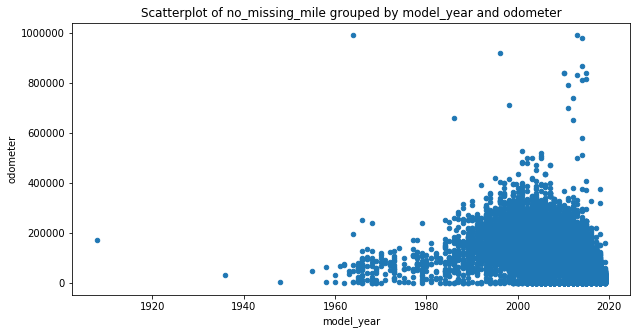

In [21]:
# check correlation matrix

print(no_missing_data.corr())

# check correlation of model year and mileage

no_missing_data.plot(x='model_year', y='odometer', kind='scatter',
                     title = 'Scatterplot of no_missing_mile grouped by model_year and odometer', figsize = (10,5)) 

The correlation matrix shows that there is not a particularly strong correlation between any of the other values with the odometer, except for the model_year.

In something of an unexpected turn of events, there is actually a strong indication of a negative correlation between the model year and the mileage on its odometer. One would normally suspect that an older car would be driven far more than a new one. There's more time to drive, after all. However, this does not mean that the data is flawed - there are many logical explanations to this.

We might assume that, for instance, the newer cars may be getting sold by afficionados who drive often and regularly switch to the newest models. This, however, mostly would account for outlier values that are seen with people who are driving constantly.

With a growing popularity of MaaS since the 2010s, it also is likely that we would see more high-mileage used cars in the market since companies like Uber, Lyft, and Transit started growing. They could have more miles put onto them as a result of more people entering that industry. If this explanation is true, it would be supported by the scatter plot showing noticeably more values of mileage above 40,000 for models of cars after the year 2000 and especially after 2010.
 
Also highly likely, we might assume that the mileage acts as a good indicator of a car's shelf life. If we look at the scatter plot, we do see a normal distribution clearly forming in the odometer and the age. This makes sense - a newer car should be able to be driven more before it needs to be replaced. While this may not make sense if the car's condition is listed as being 'good', 'excellent' or 'like new', a car owner could very well want to replace their vehicle if it is not in perfect condition.

We should probably check to see just how common outliers are in the data to determine whether a mean or median will be better to use to fill our missing data points. We can do this by making box plots grouped by the model year.

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


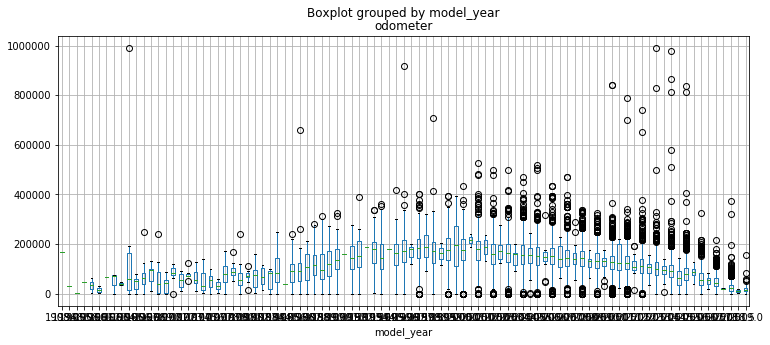

In [22]:
# use box plots to check outliers

no_missing_data.boxplot('odometer', 'model_year', figsize = (12, 5))

The graph gives a very clear picture. Regardless of the model year, we see many outliers, even as the whiskers become extremely large. This means that filling our missing values with the median, based on the model year, will be a far better choice.

In [23]:
# test to see if mileage will be filled out

test_data = data.copy(deep=False)
test_data['median_miles'] = data.groupby('model_year')['odometer'].transform(lambda x: x.fillna(x.median()))
test_data[test_data.isna().any(axis=1)]

/opt/conda/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,median_miles
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,unknown,0.0,2019-03-22,9,161894.0
15,17990,2013.0,ram 1500,excellent,8.0,gas,NaN,automatic,pickup,red,1.0,2018-05-15,111,99996.0
23,7500,2004.0,jeep wrangler,good,6.0,gas,NaN,automatic,SUV,red,1.0,2018-05-17,39,157000.0
24,3950,2009.0,chrysler 200,excellent,4.0,gas,NaN,automatic,sedan,red,0.0,2018-06-11,40,131507.0
25,11499,2017.0,chevrolet malibu,like new,4.0,gas,NaN,automatic,sedan,unknown,0.0,2018-07-26,43,41000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51498,15900,2011.0,gmc sierra 1500,excellent,8.0,gas,NaN,automatic,truck,unknown,1.0,2019-01-25,69,123618.0
51507,29500,2012.0,toyota tundra,good,8.0,gas,NaN,automatic,pickup,grey,1.0,2018-05-01,31,110339.0
51516,8999,2011.0,jeep grand cherokee,good,6.0,gas,NaN,automatic,SUV,white,1.0,2018-11-01,51,123618.0
51519,11750,2015.0,honda accord,excellent,4.0,gas,NaN,automatic,coupe,unknown,0.0,2018-11-24,89,78779.0


In [24]:
# check to see where mileage was unable to be estimated

test_data[test_data['median_miles'].isna()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,median_miles
31307,6900,1987.5,chevrolet corvette,excellent,8.0,gas,NaN,automatic,coupe,white,0.0,2018-09-25,23,NaN
45694,18000,1929.0,ford f-150,good,8.0,gas,NaN,manual,other,silver,0.0,2018-11-18,59,NaN


As we see, there were no complications with running the estimation of our odometer values as opposed to the other two (though that might be since we saved it for last and missing values in other columns was the problem previously). There are only two vehicles for which we could not estimate the mileage, and of those two, one of them is a vintage car from 1929.

It is safe to say that there is no controversy in dropping both of these rows.

In [25]:
# check mileage data

data['odometer'] = data.groupby('model_year')['odometer'].transform(lambda x: x.fillna(x.median()))
data.dropna(subset = ['odometer'], inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50679 entries, 0 to 51524
Data columns (total 13 columns):
price           50679 non-null int64
model_year      50679 non-null float64
model           50679 non-null object
condition       50679 non-null object
cylinders       50679 non-null float64
fuel            50679 non-null object
odometer        50679 non-null float64
transmission    50679 non-null object
type            50679 non-null object
paint_color     50679 non-null object
is_4wd          50679 non-null float64
date_posted     50679 non-null object
days_listed     50679 non-null int64
dtypes: float64(4), int64(2), object(7)
memory usage: 5.4+ MB


With this, we have eliminated all of our missing values while sacrificing less than 2% of our data.

Next, we should make sure all the data types are in the right format.


## Fix data types

The data is more or less complete, but we still want to update the 'date_posted' column to a date format.

In [26]:
data['date_posted'] = pd.to_datetime(data['date_posted'], format='%Y-%m-%d')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50679 entries, 0 to 51524
Data columns (total 13 columns):
price           50679 non-null int64
model_year      50679 non-null float64
model           50679 non-null object
condition       50679 non-null object
cylinders       50679 non-null float64
fuel            50679 non-null object
odometer        50679 non-null float64
transmission    50679 non-null object
type            50679 non-null object
paint_color     50679 non-null object
is_4wd          50679 non-null float64
date_posted     50679 non-null datetime64[ns]
days_listed     50679 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(2), object(6)
memory usage: 5.4+ MB


## Enrich data

To make analysis easier, there are a few things we can do with our data, as we can see in our objectives, to make our data more clear to work with.

First, we want to expand the dates we have. We will be able to take the date_posted variable and generate more columns off of it that show the day of the week, the month, and the year which the ad was posted. This could prove useful if we want to see the results based on certain times of the year, or if certain days are better times to post ads.

We also wish to make a column that shows how old the vehicle was when the ad was posted. This will be simple, as we will be able to compare the date of the ad posting with the model_year column. Since a model year does not always line up with a calendar year, it is possible that a good amount of our data could result in an age = 0 value, which would cause issues in a few ways. As such, we will add 1 to this.

Next, we will want to find the average mileage per year of the vehicle. This should be as simple as dividing the vale on the odometer by the vehicle's age.

Finally, switching around the condition values into a numerical ranking will make the data easier to read and sort. We will be able to give each of the data set's 'condition' values a rank from 0 to 5.

In [27]:
# Add datetime values for when the ad was placed

data['year'] = pd.DatetimeIndex(data['date_posted']).year
data['month'] = pd.DatetimeIndex(data['date_posted']).month
data['weekday'] = pd.DatetimeIndex(data['date_posted']).weekday

data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year,month,weekday
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,unknown,1.0,2018-06-23,19,2018,6,5
1,25500,2014.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,2018,10,4
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,2019,2,3
3,1500,2003.0,ford f-150,fair,8.0,gas,161894.0,automatic,pickup,unknown,0.0,2019-03-22,9,2019,3,4
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,2019,4,1


In [28]:
# Add the vehicle's age when the ad was placed

data['age'] = data['year'] - data['model_year'] + 1
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year,month,weekday,age
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,unknown,1.0,2018-06-23,19,2018,6,5,8.0
1,25500,2014.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,2018,10,4,5.0
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,2019,2,3,7.0
3,1500,2003.0,ford f-150,fair,8.0,gas,161894.0,automatic,pickup,unknown,0.0,2019-03-22,9,2019,3,4,17.0
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,2019,4,1,3.0


In [29]:
# Add the vehicle's average mileage per year

data['miles_per_year'] = data['odometer'] / data['age']
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year,month,weekday,age,miles_per_year
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,unknown,1.0,2018-06-23,19,2018,6,5,8.0,18125.000000
1,25500,2014.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,2018,10,4,5.0,17741.000000
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,2019,2,3,7.0,15714.285714
3,1500,2003.0,ford f-150,fair,8.0,gas,161894.0,automatic,pickup,unknown,0.0,2019-03-22,9,2019,3,4,17.0,9523.176471
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,2019,4,1,3.0,26967.666667


In [30]:
# replace the condition values with something that can be manipulated more easily

def assign_group(x):
    if x == 'new':
        return 5
    elif x == 'like new':
        return 4
    elif x == 'excellent':
        return 3
    elif x == 'good':
        return 2
    elif x == 'fair':
        return 1
    elif x == 'salvage':
        return 0
    else:
        return x

data['condition'] = data['condition'].apply(assign_group)
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year,month,weekday,age,miles_per_year
0,9400,2011.0,bmw x5,2,6.0,gas,145000.0,automatic,SUV,unknown,1.0,2018-06-23,19,2018,6,5,8.0,18125.000000
1,25500,2014.0,ford f-150,2,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,2018,10,4,5.0,17741.000000
2,5500,2013.0,hyundai sonata,4,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,2019,2,3,7.0,15714.285714
3,1500,2003.0,ford f-150,1,8.0,gas,161894.0,automatic,pickup,unknown,0.0,2019-03-22,9,2019,3,4,17.0,9523.176471
4,14900,2017.0,chrysler 200,3,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,2019,4,1,3.0,26967.666667


## Check clean data

For a final check of our clean data, we should make sure that the columns are all fine and then we should also look at a sample to ensure the date columns we have generated are accurate.

In [31]:
# print the general/summary information about the DataFrame

data.describe()

,price,model_year,condition,cylinders,odometer,is_4wd,days_listed,year,month,weekday,age,miles_per_year
count,50679.000000,50679.000000,50679.000000,50679.000000,50679.000000,50679.000000,50679.000000,50679.000000,50679.000000,50679.000000,50679.000000,5.067900e+04
mean,12121.290712,2009.752353,2.636378,6.122842,115263.262278,0.496557,39.539138,2018.307287,6.630222,3.004381,9.554934,inf
std,10010.378724,6.202554,0.710950,1.657506,62175.876183,0.499993,28.172538,0.461374,3.473989,1.998268,6.216070,NaN
min,1.000000,1908.000000,0.000000,3.000000,0.000000,0.000000,0.000000,2018.000000,1.000000,0.000000,0.000000,0.000000e+00
25%,5000.000000,2006.000000,2.000000,4.000000,73309.000000,0.000000,19.000000,2018.000000,3.000000,1.000000,5.000000,9.866000e+03
50%,9000.000000,2011.000000,3.000000,6.000000,114000.000000,0.000000,33.000000,2018.000000,7.000000,3.000000,8.000000,1.325455e+04
75%,16801.500000,2014.000000,3.000000,8.000000,152972.000000,1.000000,53.000000,2019.000000,10.000000,5.000000,13.000000,1.764862e+04
max,375000.000000,2019.000000,5.000000,12.000000,990000.000000,1.000000,271.000000,2019.000000,12.000000,6.000000,111.000000,inf


There still remain some outliers such as the min price = 1, but our analysis will first cover as much of the data as possible, disregarding outliers. One thing that does seem strange is that even after adding 1 to our age value, there are ages that are less than one, suggesting for instance a 2018 model is being sold in 2017. This also is causing issues in our miles per year, since we can't divide the average mileage by 0. Is there an issue with something we have done in our data set, or is it perhaps someone who is putting an entry on for next year's model? Let's take a closer look.

In [32]:
# check entries where miles per year is less than 1

data[data['age'] < 1]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year,month,weekday,age,miles_per_year
1689,56990,2018.5,chevrolet silverado 2500hd,3,8.0,diesel,3993.0,automatic,truck,white,1.0,2018-10-08,2,2018,10,0,0.5,7986.0
2976,287,2019.0,chevrolet impala,4,6.0,gas,36147.0,automatic,sedan,unknown,0.0,2018-08-09,64,2018,8,3,0.0,inf
46182,24100,2019.0,chevrolet camaro lt coupe 2d,2,6.0,gas,18755.0,other,coupe,unknown,0.0,2018-08-06,45,2018,8,0,0.0,inf


We see here that it seems all of these data points have had some sort of incompleteness in their original entries. It's plausible that we had to estimate all of their model years and our estimation was off the mark for one reason or another. We can say for certain that at least one had a missing model year, and two had missing paint colors. The Impala has a bizarrely low price of 287.

Let's check the original data set for these.

In [33]:
# check the original entries where miles per year was set negative

print(og_data.iloc[1689])
print(og_data.iloc[2976])
print(og_data.iloc[46182])

price                                56990
model_year                             NaN
model           chevrolet silverado 2500hd
condition                        excellent
cylinders                                8
fuel                                diesel
odometer                              3993
transmission                     automatic
type                                 truck
paint_color                          white
is_4wd                                   1
date_posted                     2018-10-08
days_listed                              2
Name: 1689, dtype: object
price                        287
model_year                   NaN
model           chevrolet impala
condition               like new
cylinders                      6
fuel                         gas
odometer                   36147
transmission           automatic
type                       sedan
paint_color                  NaN
is_4wd                       NaN
date_posted           2018-08-09
days_listed        

It is now confirmed that all of these originally had missing model years and that for one reason or another, likely their prices, they were estimated with dates that come after their posting date. We could try and re-estimate the dates for them, but there is no need to lose sleep in dropping these columns.

In [34]:
# remove the columns with error age values

data = data[data['age'] >= 1]
data.describe()

,price,model_year,condition,cylinders,odometer,is_4wd,days_listed,year,month,weekday,age,miles_per_year
count,50676.000000,50676.000000,50676.000000,50676.000000,50676.000000,50676.000000,50676.000000,50676.000000,50676.000000,50676.000000,50676.000000,50676.000000
mean,12120.402459,2009.751815,2.636356,6.122810,115268.923632,0.496566,39.539289,2018.307305,6.630101,3.004499,9.555490,14546.592984
std,10008.411004,6.202344,0.710938,1.657534,62173.280185,0.499993,28.172658,0.461382,3.474049,1.998238,6.215834,8660.948611
min,1.000000,1908.000000,0.000000,3.000000,0.000000,0.000000,0.000000,2018.000000,1.000000,0.000000,1.000000,0.000000
25%,5000.000000,2006.000000,2.000000,4.000000,73320.000000,0.000000,19.000000,2018.000000,3.000000,1.000000,5.000000,9866.000000
50%,9000.000000,2011.000000,3.000000,6.000000,114000.000000,0.000000,33.000000,2018.000000,7.000000,3.000000,8.000000,13253.335227
75%,16800.000000,2014.000000,3.000000,8.000000,152972.000000,1.000000,53.000000,2019.000000,10.000000,5.000000,13.000000,17647.356618
max,375000.000000,2019.000000,5.000000,12.000000,990000.000000,1.000000,271.000000,2019.000000,12.000000,6.000000,111.000000,373200.000000


In [35]:
# print a sample of data

data.head(15)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year,month,weekday,age,miles_per_year
0,9400,2011.0,bmw x5,2,6.0,gas,145000.0,automatic,SUV,unknown,1.0,2018-06-23,19,2018,6,5,8.0,18125.000000
1,25500,2014.0,ford f-150,2,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,2018,10,4,5.0,17741.000000
2,5500,2013.0,hyundai sonata,4,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,2019,2,3,7.0,15714.285714
3,1500,2003.0,ford f-150,1,8.0,gas,161894.0,automatic,pickup,unknown,0.0,2019-03-22,9,2019,3,4,17.0,9523.176471
4,14900,2017.0,chrysler 200,3,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,2019,4,1,3.0,26967.666667
5,14990,2014.0,chrysler 300,3,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15,2018,6,2,5.0,11590.800000
6,12990,2015.0,toyota camry,3,4.0,gas,79212.0,automatic,sedan,white,0.0,2018-12-27,73,2018,12,3,4.0,19803.000000
7,15990,2013.0,honda pilot,3,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68,2019,1,0,7.0,15639.000000
8,11500,2012.0,kia sorento,3,4.0,gas,104174.0,automatic,SUV,unknown,1.0,2018-07-16,19,2018,7,0,7.0,14882.000000
9,9200,2008.0,honda pilot,3,6.0,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17,2019,2,4,12.0,12265.916667


## Study core parameters

There are certain parameters we want to analyze for connections.

The parameters are:
- Price
- The vehicle's age when the ad was placed
- Mileage
- Number of cylinders
- Condition

Since the scope of our goal is to see if these factors impact the price, a good way to get an overhead view of the data is to start by checking some plots of [parameter] as our x-value and price as our y-value.

Before going into plotting, we can check a correlation matrix to get a basic idea of what to expect.


In [36]:
# correlation matrix

data.corr()

,price,model_year,condition,cylinders,odometer,is_4wd,days_listed,year,month,weekday,age,miles_per_year
price,1.000000,0.434920,0.218676,0.296819,-0.426742,0.316068,-0.000874,0.003981,-0.005448,-0.000588,-0.433680,0.168072
model_year,0.434920,1.000000,0.283604,-0.148780,-0.508254,0.040651,-0.003978,0.007923,-0.008596,-0.005935,-0.997242,0.432277
condition,0.218676,0.283604,1.000000,-0.066429,-0.292361,0.014308,-0.002691,0.004032,-0.002577,0.000860,-0.282689,0.054074
cylinders,0.296819,-0.148780,-0.066429,1.000000,0.092193,0.404292,0.003951,-0.001071,0.002255,-0.002899,0.148378,-0.030034
odometer,-0.426742,-0.508254,-0.292361,0.092193,1.000000,0.029657,0.002896,-0.006074,0.009100,0.000671,0.506700,0.215525
is_4wd,0.316068,0.040651,0.014308,0.404292,0.029657,1.000000,0.002318,-0.003168,0.004580,0.004637,-0.040798,0.060268
days_listed,-0.000874,-0.003978,-0.002691,0.003951,0.002896,0.002318,1.000000,0.011085,-0.011395,0.002974,0.004793,-0.005191
year,0.003981,0.007923,0.004032,-0.001071,-0.006074,-0.003168,0.011085,1.000000,-0.818080,-0.008349,0.066321,-0.127685
month,-0.005448,-0.008596,-0.002577,0.002255,0.009100,0.004580,-0.011395,-0.818080,1.000000,0.006704,-0.052146,0.106817
weekday,-0.000588,-0.005935,0.000860,-0.002899,0.000671,0.004637,0.002974,-0.008349,0.006704,1.000000,0.005302,-0.003528


**Non-Price Correlations**

We see some rather obvious connections here, as well as some that seem a bit less obvious.

Model_year is roughly 1 to 1 with age (the only reason they are not direct inverses is because there are approximated model_year values with 0.5), strongly correlated with the mileage (newer cars seem to have fewer miles) and has a correlation with the condition suggesting newer cars are correlated with being in better condition. These are all fairly obvious judgments to make.

It does not appear that there is a correlation between the mileage overall and the miles per year. This would probably indicate that cars tend to be driven at around the same rate on a yearly basis.

Condition is correlated with the mileage - another obvious connection. A car that is in better condition is likely to be driven less overall.

There is a strong indication that there is a correlation between a car's status being 4-wheel drive and the number of cylinders it has. Since 4-wheel drive is a boolean, it's essentially saying that a car with 4-wheel drive is likely to have more cylinders.

**Price Correlations**

The correlation matrix shows some information that seems fairly obvious. It's useful to confirm, since even if it "seems" obvious it doesn't mean that it would be true.

**Strong Correlation**

The price is most strongly correlated with the car's model year and age (the two are approximately the same, just inverted since the model year and age are inverses of one another - this means that as the price rises then more likely the model year will rise with it and, respectively, the age will fall). The mileage is also strongly correlated with the price, with cars that have higher prices being correlated with lower mileage, as another fairly obvious line of logic.

**Weaker Correlation**

There are weaker connections with the number of cylinders, the 4-wheel drive, the annual mileage, and the condition. These are factors that we can unpack and consider why there might be a connection that isn't as strong.

The most likely reason behind 4-wheel drive and the number of cylinders would be that they are factors that would increase the price of the car since they are features of the car that alter its performance. However, to many people buying cars they might not be seen as particularly essential, since they may only be shopping for a car and not care about the performance.

**Odd Results**

Annual mileage being positively correlated seems a bit counterintuitive, since the mileage is strongly correlated negatively with the price. Mileage per year is negatively correlated with age, meaning as a car is older it will have fewer miles per year. Likely, this may be a result of the analysis we saw earlier - where more recent cars have more outliers in their mileage that might impact the data. It could also simply mean that newer cars get driven more frequently while older cars are driven less frequently.

The condition not having a strong correlation with price seems a bit odd since one would believe it should be a very strong predictor of a car's price. What this might indicate is that most of the values of the condition variable are about the same. If most of our data on that variable is 2 or 3, then that would imply that cars in poor condition or ones that are practically new are simply not being observed as often - a conclusion that would make sense.

**Next Steps**

For starters let's create some scatter plots to get visualizations of the price based on age, mileage, miles per year, cylinders, and condition.

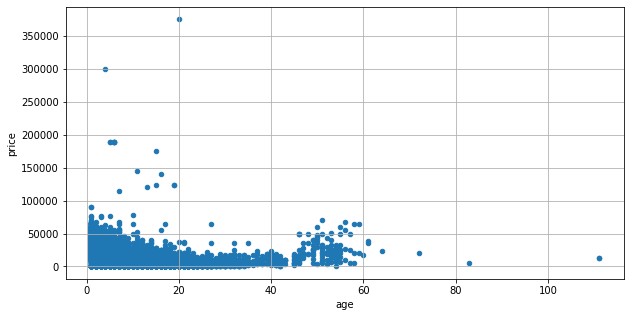

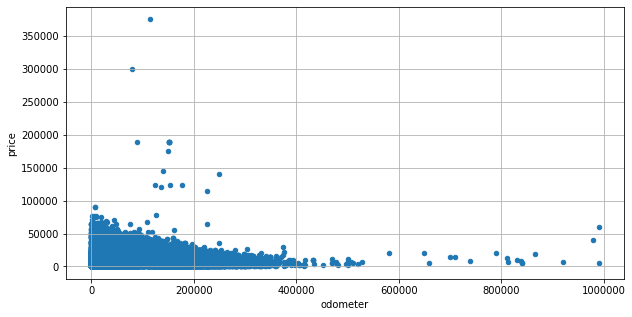

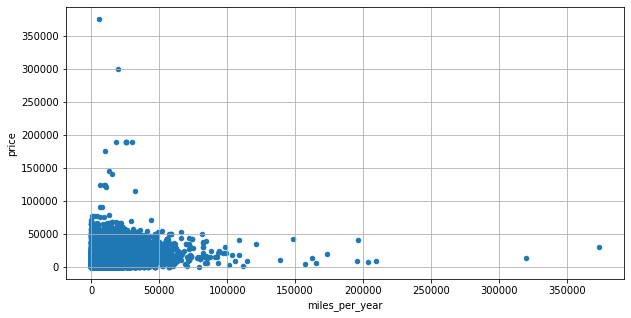

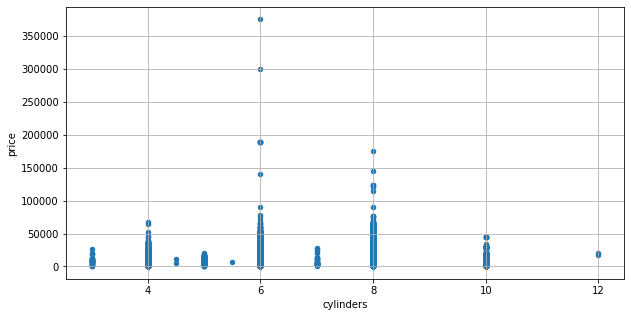

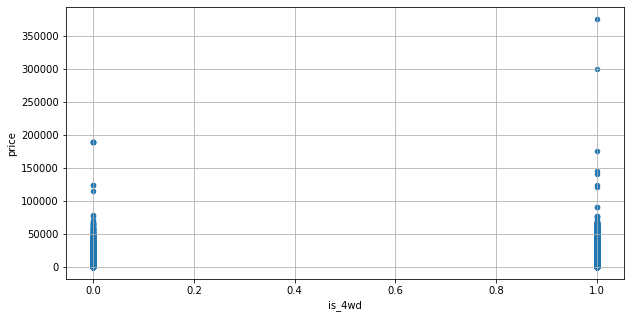

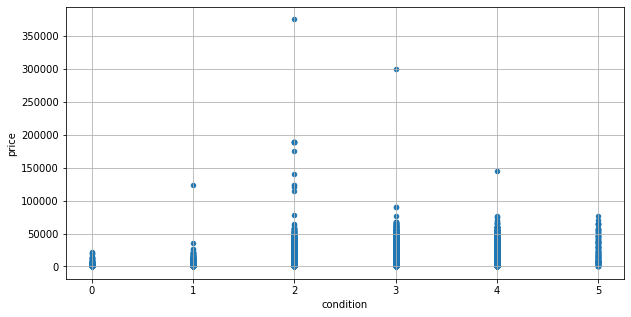

In [37]:
# establish which columns to plot

data_to_scatter = ['age', 'odometer', 'miles_per_year', 'cylinders', 'is_4wd', 'condition']

# scatter plots

for cols in data_to_scatter:
    data.plot(
        x=cols, 
        y='price', 
        kind='scatter', 
        figsize = (10,5),
        grid = True
    )

These scatter plots provide some insight that we could not get from the simple correlation matrix. Let's see what each one is saying.

**Age**

The age compared to price shows us a pretty consistent logarithmic reduction in price for about 40 years. There are a good amount of outliers for new, extremely expensive cars. For cars after that, the price begins to increase. It either appears to be a continuation of what appeared to be a log reduction into a quadratic model, or it could be that cars that are approximately 40 years old start to be considered "vintage" and they have a different metric that increases their price.

**Mileage**

The mileage also shows that most of the cars being sold have under 40,000 miles on them, and they steadily decrease in price as the odometer increases. An obvious and clear conclusion without any noticeable error. We do, however, still see those outliers. Miles per year, however, looks to be more normally distributed - people aren't looking at a car and analyzing how much it was driven per year, they only care about how much it was driven overall.

**Cylinders and 4-Wheel Drive**

Cylinders have some effect on the price, it seems, but it is mostly that the extreme values have low value than it is the medium values have increased value. 6 and 8 cylinder cars have generally higher prices as well as more extreme highs, 10 and 4 cylinder cars have fewer observations but of those, they have generally lower prices, then there are 3 and 12 cylinder cars have too few observations to work with but of those they have the lowest prices.

Most likely, it could be concluded that the number of cylinders does not have a significant impact on price, and the most simple conclusion is that most cars are built with 4, 6, or 8 cylinders and it is other factors that have a greater impact on price that might be correlated with cylinders (our earlier correlation matrix shows a weak positive correlation between age and number of cylinders).

Whether or nor a car is 4 wheel drive, on average, does not appear to have an impact on the price, either. Similarly to the cylinders, the correlation matrix did show a slight correlation, but that appears to be primarily the result of outlier values.

**Condition**

Condition also does not seem to have a huge impact on price, with a couple caveats. Cars that have been classified as being "junkers" or in "poor" condition have noticeably lower prices than all other categories. However, of those other categories, their prices are relatively consistent. Cars merely in "good" condition do seem to have slightly lower prices than the others, but they also have more outliers. We could redo analysis by redefining the 'condition' column into a boolean where poor condition (0 and 1) is set to 0 and good condition (2-5) is set to 1, but the results we see here more than sufficiently answer the question posed.

**Next Steps**

Based on these results, let's drop the cylinders and 4-wheel drive values as they do not show an indication on impacting price. We are also equipped to ignore the condition value, as we have a conclusion ready there. For our remaining data, let's see if we can plot and interpolate a function line.

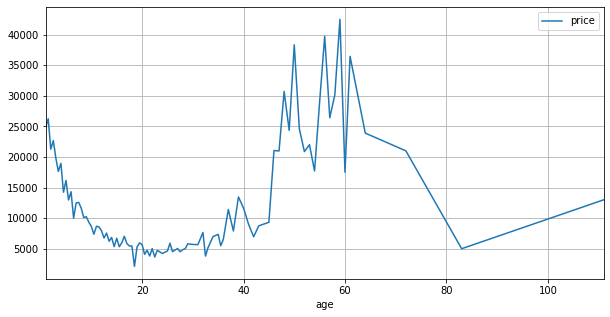

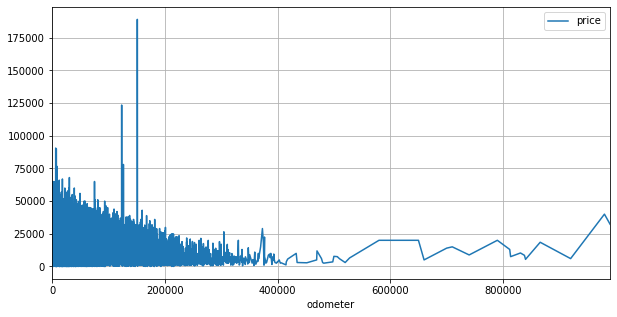

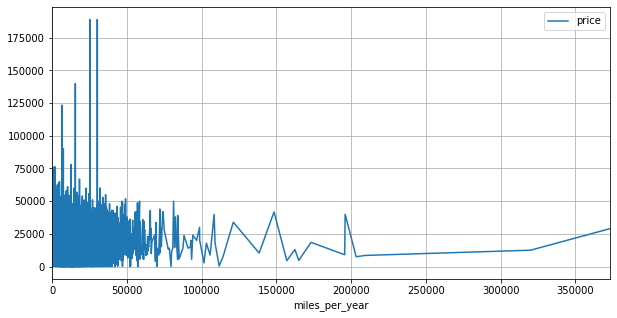

In [38]:
# create data to plot

data_to_plot = ['age', 'odometer', 'miles_per_year']

# plot data

for cols in data_to_plot:
    (data
     .pivot_table(index=cols, values='price')
     .plot(grid=True, figsize=(10, 5))
    )

These plots are essentially the same as our scatter plots, but the different format shows us a little more insight.

We can see a fairly clear pattern of the price with respect to age, for about 30 years, at which point the values begin to fluctuate greatly. This likely is simply because of a lack of data points. Thus, it would probably be a good idea to remove values over 30 years of age, or older than 1990.

The mileage also shows a similar idea. It shows a clear pattern, with a few outliers skewing the data on certain points, until we reach around 400,000 miles where we seem to not have enough observations to create a solid pattern. We will, then, remove both the outliers and the values with more than 400,000 miles.

The miles per year, most likely, will be covered for based on the odometer. Since its graph starts to become strange around the 125,000 mark, that means that for a car more than 2 years old its odometer is at 250,000, or for a car at 3 years it is 375,000 - meaning it is likely to be solved when we remove the strange odometer values. We should double check once we do, regardless. One thing to note is that the prices actually increase slightly around the 40,000 mile mark on the odometer. It is difficult to consider a rationale for this that would apply over a large set of data.

## Study and treat outliers

As we have seen, there are outliers in the ages of our cars, as well as in the mileage. It is something that could be noticed in some of our observations as well.

We will make a separate data frame as we remove outliers.

**Age Outliers**

We should check to see the ages of the cars in our data set to see just how many outliers we have there. A histogram separated into 5-year increments will serve this purpose well.

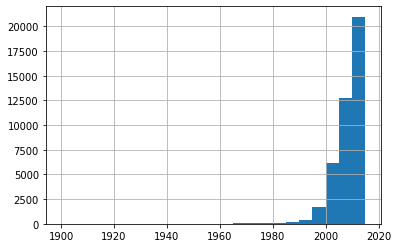

In [39]:
# histogram for model year outliers

data['model_year'].hist(bins=range(1900, 2020, 5));


We see that there is a rather normal distribution of cars and that once the cars get older than approximately 1995 there is a sharp decline in entries. While there may be a debate if they count as "vintage", it would probably be simpler to remove all the values of our data set where the model is older than 1995. Depending on how much data we lose it may be better to restrict it to cars that are a little older (after all, the distribution of the values still is normal).

In [40]:
# check proportion of data that will be lost based on certain years

for i in range(1980,2000,5):
    print('Entries from', i, 'onwards:\n', len(data[data['model_year'] >= i]))
    print('Proportion of data set remaining: \n', len(data[data['model_year'] >= i]) / len(data), '\n')

Entries from 1980 onwards:
 50489
Proportion of data set remaining: 
 0.9963098902833688 

Entries from 1985 onwards:
 50431
Proportion of data set remaining: 
 0.995165364275002 

Entries from 1990 onwards:
 50239
Proportion of data set remaining: 
 0.9913765885231668 

Entries from 1995 onwards:
 49842
Proportion of data set remaining: 
 0.9835425053279659 



In either case, we will lose a chunk of our data set. If we include cars from 1980 onwards, we will lose about 0.4% of our data. We do not lose significantly more of our data set by making it start at 1990, the point at which the graph started looking strange, and we will still have a large data set of over 50,000 entries.

1995 is a perfectly good option, but 1990 could still be fine for accuracy.

In [41]:
# remove the outlier years

no_outliers = data[data['model_year'] >= 1990]
no_outliers.describe()

,price,model_year,condition,cylinders,odometer,is_4wd,days_listed,year,month,weekday,age,miles_per_year
count,50239.000000,50239.000000,50239.000000,50239.000000,50239.000000,50239.000000,50239.000000,50239.000000,50239.000000,50239.000000,50239.000000,50239.000000
mean,12118.315313,2010.017795,2.638767,6.110542,115490.955622,0.499074,39.526961,2018.307212,6.630825,3.002747,9.289417,14651.677416
std,9986.337948,5.448783,0.709514,1.656495,61961.674162,0.500004,28.169947,0.461342,3.474034,1.997937,5.463330,8622.138532
min,1.000000,1990.000000,0.000000,3.000000,0.000000,0.000000,0.000000,2018.000000,1.000000,0.000000,1.000000,0.000000
25%,5000.000000,2006.000000,2.000000,4.000000,73711.000000,0.000000,19.000000,2018.000000,3.000000,1.000000,5.000000,9961.500000
50%,9000.000000,2011.000000,3.000000,6.000000,114587.000000,0.000000,33.000000,2018.000000,7.000000,3.000000,8.000000,13333.333333
75%,16803.000000,2014.000000,3.000000,8.000000,152972.000000,1.000000,53.000000,2019.000000,10.000000,5.000000,13.000000,17714.285714
max,375000.000000,2019.000000,5.000000,12.000000,990000.000000,1.000000,271.000000,2019.000000,12.000000,6.000000,30.000000,373200.000000


**Mileage Outliers**

We observed quite a few high results on the odometers of cars. Based on our full data set, any mileage greater than 272,450 is an outlier. We will display a few histograms to see how many we have. First, let's look over the full set, with a maximum mileage of 990000, separated into 50,000 mile increments.

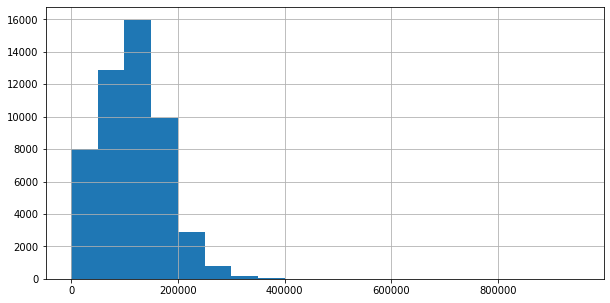

In [42]:
# mileage histogram

data['odometer'].hist(bins=range(0, 990000, 50000), figsize = (10,5));

Most of our observations cut off around 400,000, so let's take a closer look at that area, specifically. Let's check using increments of 10,000.

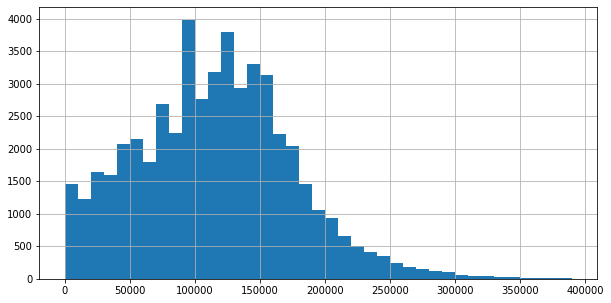

In [43]:
# check mileage histogram with more detail

data['odometer'].hist(bins=range(0, 400000, 10000), figsize = (10,5));

We can trace what appears to be a normal distribution from this, but it is very apparent that it is skewed. It would probably be fine if we wanted to include all the data up to 400,000, but since it was the cutoff we originally saw, we will make our dataset not include mileage higher than 272,450.

In [44]:
# remove large outliers

no_outliers = no_outliers[no_outliers['odometer'] < 272450]
no_outliers.describe()

,price,model_year,condition,cylinders,odometer,is_4wd,days_listed,year,month,weekday,age,miles_per_year
count,49631.000000,49631.000000,49631.000000,49631.000000,49631.000000,49631.000000,49631.000000,49631.000000,49631.000000,49631.000000,49631.000000,49631.000000
mean,12190.626685,2010.101308,2.646310,6.102648,112917.129062,0.498297,39.528984,2018.306865,6.632548,3.002317,9.205557,14521.746921
std,10011.193343,5.400757,0.705971,1.656120,56882.302403,0.500002,28.179165,0.461197,3.473325,1.998401,5.414611,8007.508943
min,1.000000,1990.000000,0.000000,3.000000,0.000000,0.000000,0.000000,2018.000000,1.000000,0.000000,1.000000,0.000000
25%,5000.000000,2007.000000,2.000000,4.000000,73026.000000,0.000000,19.000000,2018.000000,3.000000,1.000000,5.000000,9928.571429
50%,9290.000000,2011.000000,3.000000,6.000000,113419.000000,0.000000,33.000000,2018.000000,7.000000,3.000000,8.000000,13236.000000
75%,16900.000000,2014.000000,3.000000,8.000000,151587.000000,1.000000,53.000000,2019.000000,10.000000,5.000000,13.000000,17579.538462
max,375000.000000,2019.000000,5.000000,12.000000,272436.000000,1.000000,271.000000,2019.000000,12.000000,6.000000,30.000000,195700.000000


**One More Thing**

While we generally should not remove outliers on our dependent variable, price, we can see in multiple places throughout the analysis that there is something that looks a tad strange. There is the minimum value of 1. It may be the prerogative of a seller to set a price they desire, but is this price something that we should expect to see?

Number of price values equal to 1: 797


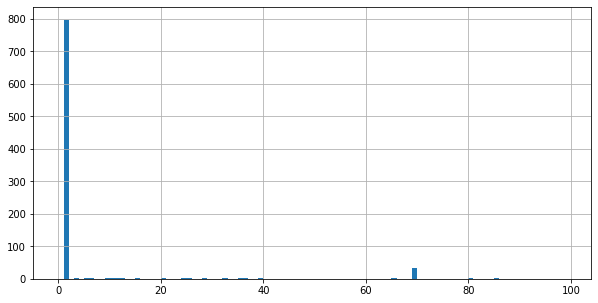

In [45]:
# check for prices = 1

print('Number of price values equal to 1:', len(data[data['price']==1]))
data['price'].hist(bins=range(0, 100), figsize = (10,5));

There are almost 800 values with a price of 1, which is around 1.5% of our data set. It does not appear to be natural, given the rest of the prices from 0 to 100 are rather uncommon. This seems odd, and is something that might be important to look into when it comes to data collection. Did the data use it as a filler value, is there something that we should look into on these ads, or something else?

It might be worthwhile to remove these, as they will affect any sort of judgment we make involving medians and quartiles about the price. However, it is always important to consider that removing the dependent variables will be far more likely to harm our analysis than independent ones. At present, we should be fine leaving these in.

**Summation**

After removing our outliers for the age, price, and mileage, the data set has gone from 50676 observations to 47212, roughly 93% of the data has been preserved.

Next, we can simply redo our earlier analysis to see how it looks without the outliers.

## Study core parameters without outliers

We will use our filtered data, removing outliers, to redo the earlier plots.

In [46]:
# correlation matrix

no_outliers.corr()

,price,model_year,condition,cylinders,odometer,is_4wd,days_listed,year,month,weekday,age,miles_per_year
price,1.000000,0.510301,0.209840,0.302905,-0.448246,0.323928,-0.001149,0.004381,-0.005900,-0.000321,-0.508622,0.188211
model_year,0.510301,1.000000,0.300597,-0.122687,-0.624934,0.017330,-0.002408,0.012620,-0.013639,0.000942,-0.996366,0.468418
condition,0.209840,0.300597,1.000000,-0.061957,-0.290994,0.015704,-0.001437,0.005613,-0.004357,0.002095,-0.299350,0.057125
cylinders,0.302905,-0.122687,-0.061957,1.000000,0.090330,0.413631,0.003451,-0.001064,0.002238,-0.004312,0.122283,-0.023943
odometer,-0.448246,-0.624934,-0.290994,0.090330,1.000000,0.024758,0.004817,-0.008516,0.012722,-0.000607,0.622610,0.149075
is_4wd,0.323928,0.017330,0.015704,0.413631,0.024758,1.000000,0.003462,-0.002453,0.003857,0.005156,-0.017494,0.058695
days_listed,-0.001149,-0.002408,-0.001437,0.003451,0.004817,0.003462,1.000000,0.010694,-0.011182,0.002976,0.003313,-0.003333
year,0.004381,0.012620,0.005613,-0.001064,-0.008516,-0.002453,0.010694,1.000000,-0.817916,-0.007833,0.072589,-0.137164
month,-0.005900,-0.013639,-0.004357,0.002238,0.012722,0.003857,-0.011182,-0.817916,1.000000,0.006564,-0.056063,0.114963
weekday,-0.000321,0.000942,0.002095,-0.004312,-0.000607,0.005156,0.002976,-0.007833,0.006564,1.000000,-0.001607,-0.001595


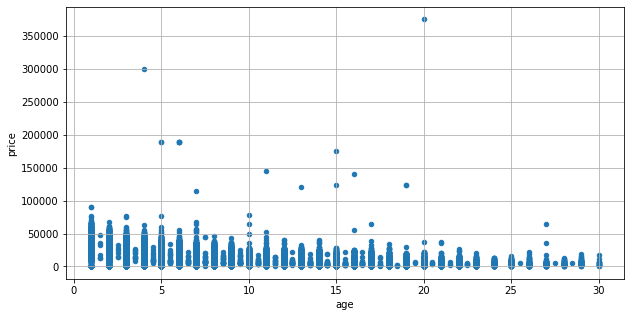

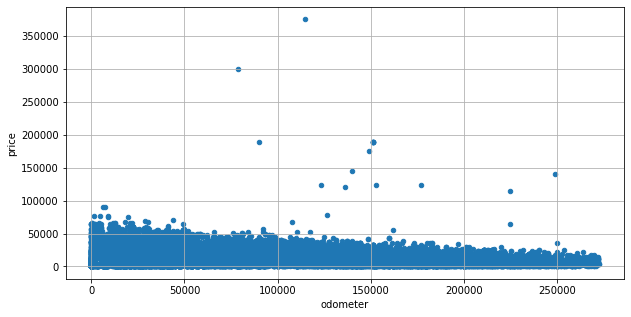

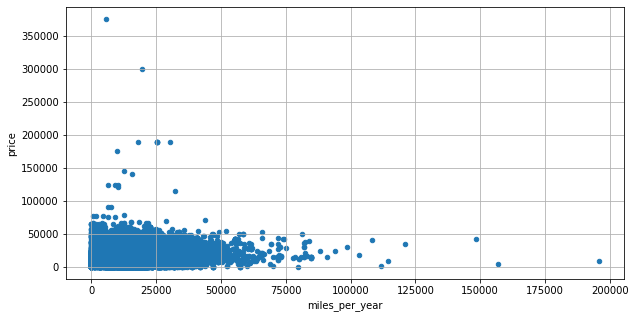

In [47]:
# establish which columns to plot

data_to_scatter = ['age', 'odometer', 'miles_per_year']

# scatter plots

for cols in data_to_scatter:
    no_outliers.plot(
        x=cols, 
        y='price', 
        kind='scatter', 
        figsize = (10,5),
        grid = True
    )

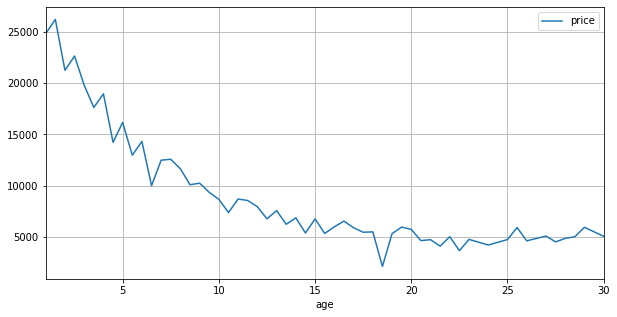

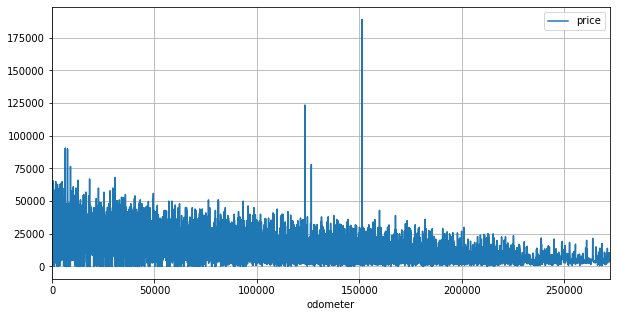

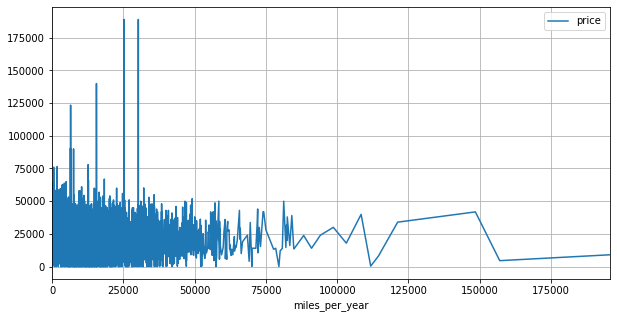

In [48]:
# create data to plot

data_to_plot = ['age', 'odometer', 'miles_per_year']

# plot data

for cols in data_to_plot:
    (no_outliers
     .pivot_table(index=cols, values='price')
     .plot(grid=True, figsize=(10, 5))
    ) 

These graphs look largely similar to the ones we saw before. We can get a good idea of exactly what the data informs us. Going graph by graph, we will analyze.

**Age**

The age of the car appears to be the single most effective metric to predict its price. It starts out fairly high and sharply declines. The scatter plot shows newer cars commonly reach nearly 100,000. Within 5 years, they rarely surpass 50,000 and the value continues to drop at a fairly steady rate. They do not, however, reach a value of 0. The value reduces logarithmically, and so it tends to even out at around 5,000 regardless of the age.

**Mileage**

The car's price declines steadily as the mileage increases, though it is more erratic than the change based on age. The reduction happens slowly and steadily. It would probably best be used as a good metric to establish what the maximum price a car is likely to be sold at, and you could make a linear approximation of said value.

**Miles Per Year**

There still does not seem to be a very good reason to answer why this is the case, but cars that get driven more miles per year have a generally more stable range of prices at which they are sold. They do not seem to increase or decrease the average price at which they are sold, but rather there is less variance in the price. The data could be useful if, for instance, building an algorithm that would estimate cars with prices between two specific values.

With this analysis done, we can move on to our other questions. The next thing to address will be the typical lifetime of an ad.

## Ads lifetime

To get an overview on the lifetime of an ad, we should start by looking at the descriptive statistics.

In [49]:
# check values for days_listed

data['days_listed'].describe()

count    50676.000000
mean        39.539289
std         28.172658
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

We see here that there are quite a few ads that take a very long time to be cleared. 75% of them remain for 53 days or less. With a median of 33 and a standard deviation of 28, 95% of the ads get removed in 89 days, and 99% of them are removed in 117 days. However, we have a maximum value of 271 days. Let's see if that is a singular outlier or if there are many to worry about by using a histogram, separated into sets of 10 days. We will also check just how many ads remain for at least 100 days.

Number of ads remaining at least 100 days: 2002


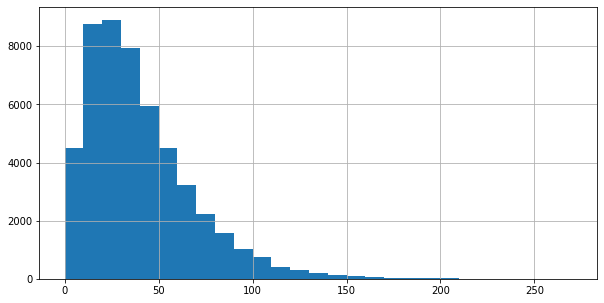

In [50]:
# histogram of ads, and check for ads older than 100 days

print("Number of ads remaining at least 100 days:", len(data[data['days_listed']>=100]))
data['days_listed'].hist(bins=range(0, 280, 10), figsize = (10,5))

We can see that there are quite a few ads that remain present for quite a bit of time, although most of the ads take about 50 days to be removed. Whether they could be called remaining for an abnormally long time, it is difficult to say. The histogram shows that there is a fairly natural decline that likely does not display a pattern. But we could take a look at some of these values, just to see if there might be something worth noting.

In [51]:
# print data frame of ads older than 200 days

data[data['days_listed']>=200]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year,month,weekday,age,miles_per_year
51,3800,2012.0,ford focus,2,4.0,gas,130323.0,automatic,sedan,black,0.0,2018-11-29,261,2018,11,3,7.0,18617.571429
2224,5995,2004.0,ford f-250,2,8.0,gas,103000.0,automatic,truck,red,1.0,2019-01-24,263,2019,1,3,16.0,6437.500000
3202,5995,2009.0,toyota prius,3,4.0,gas,130000.0,automatic,hatchback,blue,0.0,2018-10-17,244,2018,10,2,10.0,13000.000000
3243,6900,2010.0,honda accord,2,4.0,gas,80000.0,automatic,sedan,silver,0.0,2018-07-21,228,2018,7,5,9.0,8888.888889
4360,5200,2011.0,chevrolet impala,4,6.0,gas,122000.0,automatic,sedan,unknown,0.0,2018-05-24,271,2018,5,3,8.0,15250.000000
5640,6900,2011.0,kia sorento,2,4.0,gas,123618.0,automatic,wagon,grey,1.0,2018-07-12,201,2018,7,3,8.0,15452.250000
9630,8995,2008.0,toyota highlander,4,6.0,gas,156000.0,automatic,SUV,unknown,1.0,2018-10-03,207,2018,10,2,11.0,14181.818182
10650,17700,2015.0,nissan frontier crew cab sv,2,6.0,gas,67071.0,other,pickup,black,0.0,2019-01-20,206,2019,1,6,5.0,13414.200000
11698,21995,2019.0,chevrolet impala,4,6.0,gas,14410.0,automatic,sedan,black,0.0,2019-02-24,236,2019,2,6,1.0,14410.000000
14591,25988,2016.0,chevrolet silverado,3,8.0,gas,62000.0,automatic,pickup,red,0.0,2018-12-31,204,2018,12,0,3.0,20666.666667


There are two notable commonalities that we can see here. The first, and most obvious, is that the overwhelming majority of cars shown here have automatic transmission. It also appears that there are quite a few entries with a condition of 2, or "good". There also are a few sedans in there, we could check for that.

But is that to be expected? Let's check the proportions across the entire data set and then compare with cars whose ads were not removed until at least our outlier point of 104 days.

In [52]:
# define old ads

old_ad_cars = data[data['days_listed'] >= 150]

# check proportion based on condition

print("Proportion of cars in good or worse condition:", (len(data[data['condition'] <= 2]) / len(data)))
print("Proportion of old ad cars in good or worse condition:", (len(old_ad_cars[old_ad_cars['condition'] <= 2]) 
                                                                / len(old_ad_cars)), '\n')

# print proportion of automatic transmission

print("Proportion of cars with automatic transmission:", (len(data[data['transmission'] == 'automatic']) / len(data)))
print("Proportion of old ad cars with automatic transmission:", (len(old_ad_cars[old_ad_cars['transmission'] == 'automatic']) 
                                                                 / len(old_ad_cars)), '\n')

# print proportion of sedans

print("Proportion of sedans:", (len(data[data['type'] == 'sedan']) / len(data)))
print("Proportion of sedans over 150 days:", (len(old_ad_cars[old_ad_cars['type'] == 'sedan']) / len(old_ad_cars)))

Proportion of cars in good or worse condition: 0.4248954140026837
Proportion of old ad cars in good or worse condition: 0.45081967213114754 

Proportion of cars with automatic transmission: 0.9099179098587102
Proportion of old ad cars with automatic transmission: 0.9057377049180327 

Proportion of sedans: 0.23581182413765886
Proportion of sedans over 150 days: 0.22950819672131148


There is shown here that there is a slightly higher proportion of old ad cars that are not in as good condition, which makes sense. Also, a slight discrepancy in the proportion with automatic transmission, and slightly fewer sedans over 150 days. None seem to be highly correlated. There is one more thing that might be worth investigating: 'unknown' color.

In [53]:
# check for unknown color

print("Proportion of unknown color:", (len(data[data['paint_color'] == 'unknown']) / len(data)))
print("Proportion old ad cars with unknown color:", (len(old_ad_cars[old_ad_cars['paint_color'] == 'unknown']) 
                                                     / len(old_ad_cars)))

Proportion of unknown color: 0.17976951614176337
Proportion old ad cars with unknown color: 0.1762295081967213


Unfortunately, this also does not show a noticeable difference. It would have made sense, and possibly answered the question of why we were missing color data, if for instance the 'unknown' color suggested that maybe the ad did not include an image of the car (which would likely lead to the ad not being removed for a longer period). As it stands, it seems like the ads not being removed for a long period is normal results of random chance.

Let's take a quick look at ads that might be abnormally short by looking at a histogram of ads that are removed in less than a week.

Number of ads removed in a week: 3066


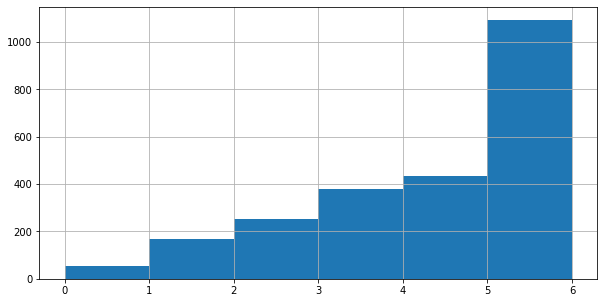

In [54]:
# check for ads removed quickly

print("Number of ads removed in a week:", len(data[data['days_listed']<=7]))
data['days_listed'].hist(bins=range(0, 7), figsize = (10,5));

This distribution looks more or less to be expected. There is not any particular reason to investigate it further.

**Possible Market Conditions**

We can also take a look at some of the categorical values to see if they impact a car's ability to get sold quickly. A car's paint job or transmission might make it harder to sell. Also, while we saw that sedans don't seem to sell at a slower rate, it is relevant to see if there may be a type of car that does. We will use box plots to visualize these.

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


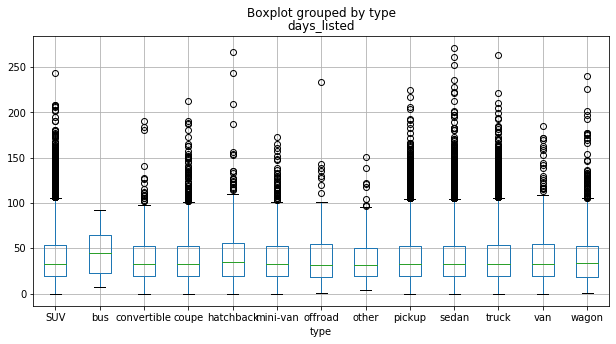

In [55]:
# plot days listed by type of car

data.boxplot(column = 'days_listed', by = 'type', figsize = (10,5));

There isn't particularly a difference in the average time these cars spend on the market, based on their model. There are more outliers in some categories such as 'sedan', 'truck', 'SUV', 'coupe', 'mini-van', and 'wagon' but those also are fairly common car types so it would be expected that they see more outliers. Seeing how the outliers don't have a great impact on the median or the quartlies, it can be concluded that a car's type doesn't necessarily make it sell more slowly.

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


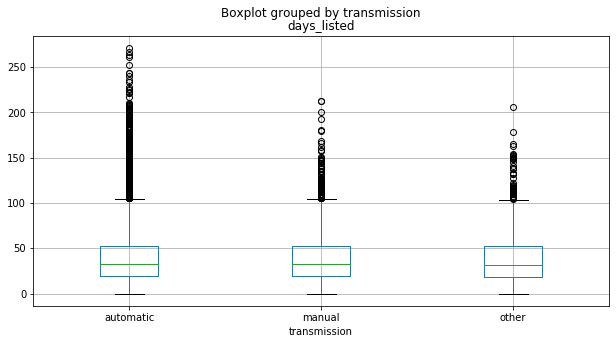

In [56]:
# plot days listed by transmission

data.boxplot(column = 'days_listed', by = 'transmission', figsize = (10,5));

Similar to the car's type, there isn't a significant difference in the length of time an ad is present before removal compared to its transmission type. Automatic are the most common car type, and manual are the middle, and we can see that they all have fewer outliers as they go on.

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


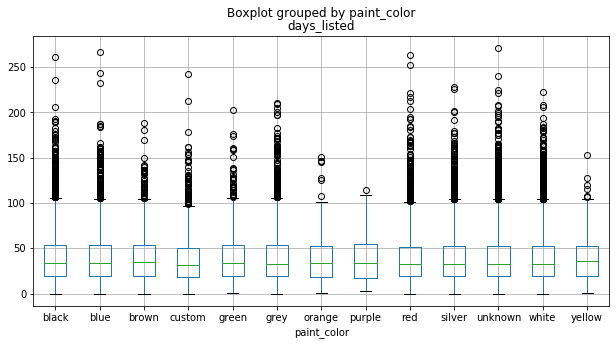

In [57]:
# plot days listed by color

data.boxplot(column = 'days_listed', by = 'paint_color', figsize = (10,5));

Paintjob also seems to not necessarily impact the length of time it takes a car to sell. This is a pretty self-apparent conclusion. Even if someone doesn't like a paint job, they can always change it. It won't make a car take longer to sell - although it may impact the price if someone really wants it changed.

Not even the elusive "unknown" paint color seems to impact. It was earlier hypothesized that perhaps "unknown" meant that a car did not have an accompanying image and that could make it harder to sell. Seeing these results suggests that is probably not the case.

Again, we see more outliers in results that are more common than others. It isn't that orange, purple and yellow cars are greatly desirable and sell quickly, there simply are less of them. A custom paint job also does not make a car sell faster, even if it might look nice.

**Next Steps**

Here we only analyzed the length of time an ad was out before being removed. It does not tell us about prices. Those will be addressed next.

## Average price per each type of vehicle


To get an initial view of the number of ads placed out, we can make a bar chart. As we saw in the previous section, we know that sedans compose about 23% of all the ads placed, so it is likely that there are a few very popular types of cars and others that are not as popular.

**Types of Car Model**

truck          12173
SUV            12155
sedan          11950
pickup          6906
coupe           2265
wagon           1519
mini-van        1138
hatchback       1030
van              617
convertible      438
other            250
offroad          211
bus               24
Name: type, dtype: int64


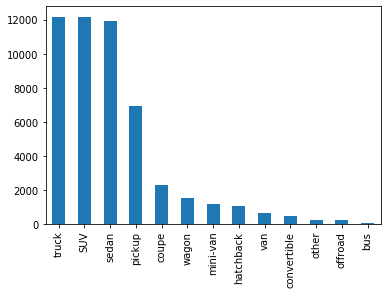

In [58]:
# check total number of cars

print(data['type'].value_counts())
data['type'].value_counts().plot(kind='bar');

We mostly see ads out there for trucks, SUVs, and sedans at around the same rate. Pickups are about half as common, but from that point on we see very low rates of ads being placed. People are more likely to sell a sedan than a convertible - makes sense.


There may be less accurate information on some of our less frequent car types, but outside of buses it is likely that we have enough observations to make some judgments. We will check the values based on each car type.

In [59]:
# descriptive statistics by type of car

data.pivot_table(index='type', values='price', aggfunc='describe')

,25%,50%,75%,count,max,mean,min,std
type,,,,,,,,
SUV,4999.0,8900.0,14990.00,12155.0,123456.0,11123.993254,1.0,8693.772110
bus,6997.0,10500.0,28990.00,24.0,28990.0,17135.666667,4995.0,11244.823971
convertible,6050.0,12500.0,18764.00,438.0,76000.0,14631.000000,1.0,12063.054372
coupe,5000.0,12995.0,21600.00,2265.0,67500.0,14334.386755,1.0,10510.208691
hatchback,4000.0,5950.0,8595.00,1030.0,34999.0,6844.109709,1.0,4132.727812
mini-van,3995.0,6495.0,10500.00,1138.0,60000.0,8113.727592,1.0,5957.330226
offroad,6500.0,11450.0,19000.00,211.0,54900.0,14066.355450,15.0,9751.125560
other,5950.0,8995.0,13224.75,250.0,49000.0,10971.520000,1.0,7888.539638
pickup,7000.0,14400.0,22999.00,6906.0,375000.0,16067.296843,1.0,11381.842914


Regardless of car type, the median price is lower than the mean. This makes sense, given we see many entries of a price = 1 (recall that there are 797 of them in the data, it's to be expected). With fewer observations in each data set, these 1.0 price values will have a greater impact on the median. As such, when plotting the average price by car type, the mean generally could be considered the superior option.

However, it would be a good idea to plot both of them at the same time. We see that there are many extreme prices for the maximum values here, such as convertibles which have 75% of their prices under 18,764 and a maximum of 76,000. Or for an even greater extreme, the pickups which have most of their values under 15,000 yet have at least one observation that reaches into six figures.

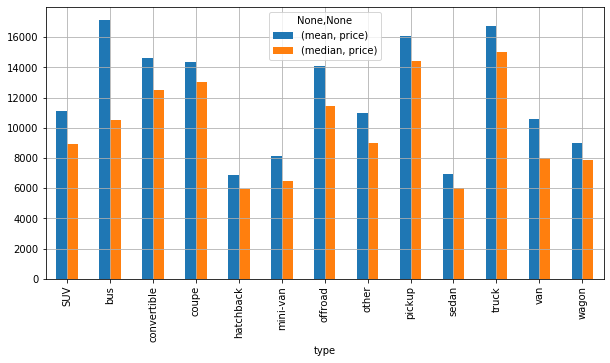

In [60]:
# plot by type of car and price

data.pivot_table(index='type', values='price', aggfunc=['mean', 'median']).plot(grid=True, kind = 'bar', figsize=(10, 5));

Fortunately, even with these odd extremes on both the mean and median, we see that the relative prices of each car type appear fairly stable. Buses have the most discrepancy, but they also only have 24 observations - that is to be expected.

For the rest of the car types, we see that trucks, pickups, coupes, convertibles, and offroads tend to be higher values (averaging over 10,000); sedans, hatchbacks, and mini-vans tend to be lower values (averaging around 6,000); and vans, SUVs, and wagons are more medium value (averaging around 8,000).

When we consider which sort of vehicles are generally considered desirable/luxury compared to ones are considered common, this does seem to make sense.

**Transmission Type**

The transmission type may also be related to the price. It could go either way - automatic cars are easier to drive, so they could be higher value, but manual cars could also be considered high value for prestige purposes. We will simply repeat the same operations as we did for the type of car and analyze afterwards.

automatic    46111
manual        2777
other         1788
Name: transmission, dtype: int64


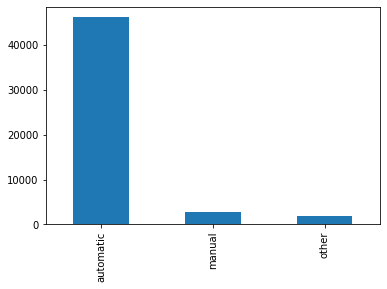

In [61]:
# aggregate of transmission type

print(data['transmission'].value_counts())
data['transmission'].value_counts().plot(kind='bar') ;

In [62]:
# descriptive statistics by transmission type

data.pivot_table(index='transmission', values='price', aggfunc='describe')

,25%,50%,75%,count,max,mean,min,std
transmission,,,,,,,,
automatic,5000.0,8999.0,15998.0,46111.0,375000.0,12039.791481,1.0,9959.107453
manual,3750.0,6900.0,13500.0,2777.0,123456.0,9872.095787,1.0,9440.349916
other,10937.5,21100.0,24300.0,1788.0,76995.0,17691.208054,1.0,10186.806704


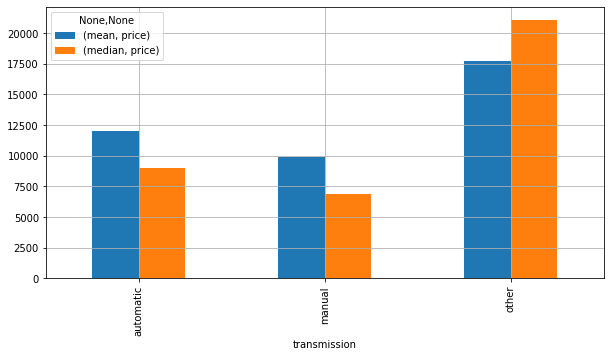

In [63]:
# plot by transmission and price

data.pivot_table(index='transmission', values='price', aggfunc=['mean', 'median']).plot(grid=True, kind = 'bar', figsize=(10, 5));

Most cars are automatic, and it would appear that their values tend to be higher than manual cars. Cars with "other" value of transmission have the highest value. It is not even close, for a comparison - the 'other' transmission types have their first quartile higher than either automatic or manual's medians. We have far fewer of them to reference, but 1788 still can give a fairly good estimate. It also would make sense. The less common transmission types are generally associated with higher performance vehicles.

**Color**

One other thing to analyze will be the color of a car. Does it greatly impact price? Are certain colors considered undesirable? It could prove useful. If someone could get a significant payout by redoing their paint before selling their car, of course they would do so. We will redo the prior analysis once more.

white      9895
unknown    9110
black      7567
silver     6144
grey       4955
blue       4381
red        4365
green      1361
brown      1195
custom     1126
yellow      251
orange      226
purple      100
Name: paint_color, dtype: int64


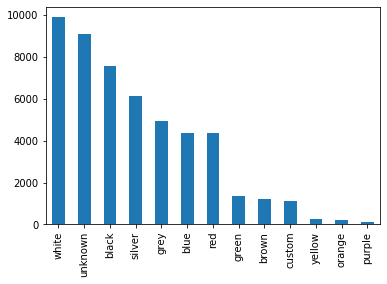

In [64]:
# aggregate of paint color

print(data['paint_color'].value_counts())
data['paint_color'].value_counts().plot(kind='bar');

In [65]:
# descriptive statistics by color

data.pivot_table(index='paint_color', values='price', aggfunc='describe')

,25%,50%,75%,count,max,mean,min,std
paint_color,,,,,,,,
black,5962.5,10995.0,18995.00,7567.0,189000.0,13707.696313,1.0,11219.167737
blue,4499.0,7500.0,13895.00,4381.0,375000.0,10287.494179,1.0,10112.260937
brown,3995.0,7000.0,14100.00,1195.0,60000.0,10197.134728,1.0,8649.146632
custom,4500.0,7995.0,13500.00,1126.0,55000.0,9981.011545,1.0,7905.864594
green,3300.0,5950.0,11500.00,1361.0,49995.0,8460.557678,1.0,7387.532240
grey,4995.0,8500.0,14995.00,4955.0,300000.0,11452.218567,1.0,10108.057000
orange,7500.0,15700.0,20674.75,226.0,43999.0,14453.778761,1.0,9008.183697
purple,3000.0,4999.5,8496.25,100.0,28000.0,6601.470000,500.0,4951.744205
red,4900.0,8701.0,15995.00,4365.0,145000.0,11472.875143,1.0,9378.685814


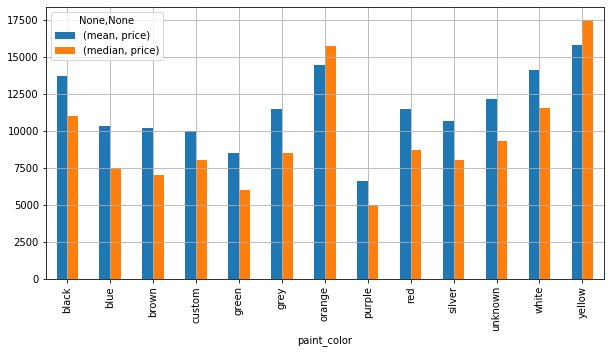

In [66]:
# plot by color and price

data.pivot_table(index='paint_color', values='price', aggfunc=['mean', 'median']).plot(grid=True, kind = 'bar', figsize=(10, 5));

Here we see something a bit odd - it appears that a car's color may very well have an impact on its price. In fact, the weird colors of yellow and orange have the highest values, even. It may simply be a result of them having fewer observations, however, so let's not make any conclusions just yet.

However, we may also see that of the normal colors - red, blue, grey, silver, white and black - that the more common they become, the higher their price becomes. That is to say, white cars average out the highest prices, followed by black, then grey which is neck and neck with silver, then red, then blue.

It may not simply be people wanting to blend in with the crowd, though. White cars would be the easiest to paint to one's preference, and black cars while harder to paint also can hide minor scuffs. There might be some explanations that could suggest it isn't directly related to the color, but it could be a good idea to paint your car if you intend to sell it.

## Price factors

We have already analyzed our prices based on the quantitative variables of age, mileage, and condition with scatter plots in section 1.6 and 1.7. To recap: age was the most strong predictor of price with a logarythmic regression that converges to approximately 5,000. Mileage was also a strong predictor, in this case being a linear pattern where cars lose value as their mileage rises. The condition seemed to have very little impact on the overall price unless the condition was "poor" or "junker".

Here, we will display those older scatter plots as well as check box plots based on the type of car, transmission type and color of the car. Before doing so, we will also alter the scale of the plots to make things more readable. There are only 9 outliers with a price greater than 150,000, so we will only display the plots from 0 to 150,000.

While we will be using the full data set rather than the ones without outliers, we also will, for the scatter plots, have cutoff points at age = 60 and odometer = 600,000 since there are extreme values that cover most of the plots.

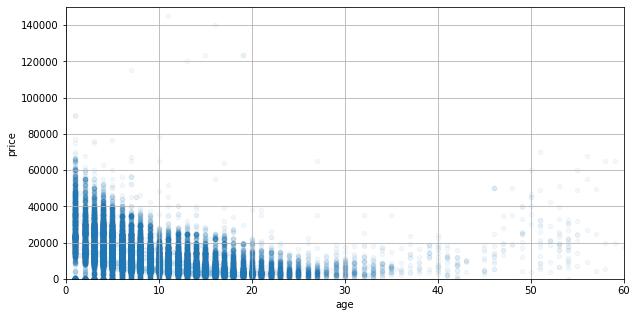

In [67]:
# scatter plot by age

data.plot(
        x='age', 
        y='price', 
        kind='scatter', 
        figsize = (10,5),
        grid = True, alpha=0.05
)
plt.ylim(0, 150000)
plt.xlim(0, 60)
plt.show()

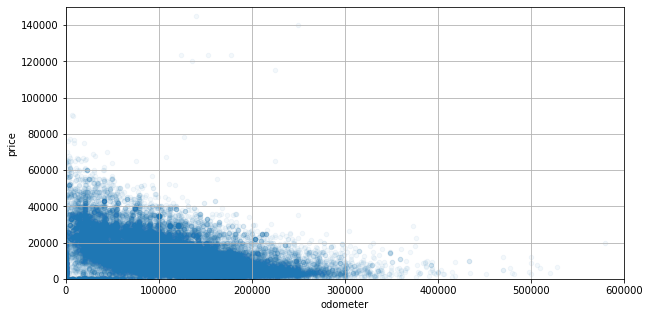

In [68]:
# scatter plot by mileage

data.plot(
        x='odometer', 
        y='price', 
        kind='scatter', 
        figsize = (10,5),
        grid = True, alpha=0.05
)
plt.ylim(0, 150000)
plt.xlim(0, 600000)
plt.show()

**Car Condition**

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


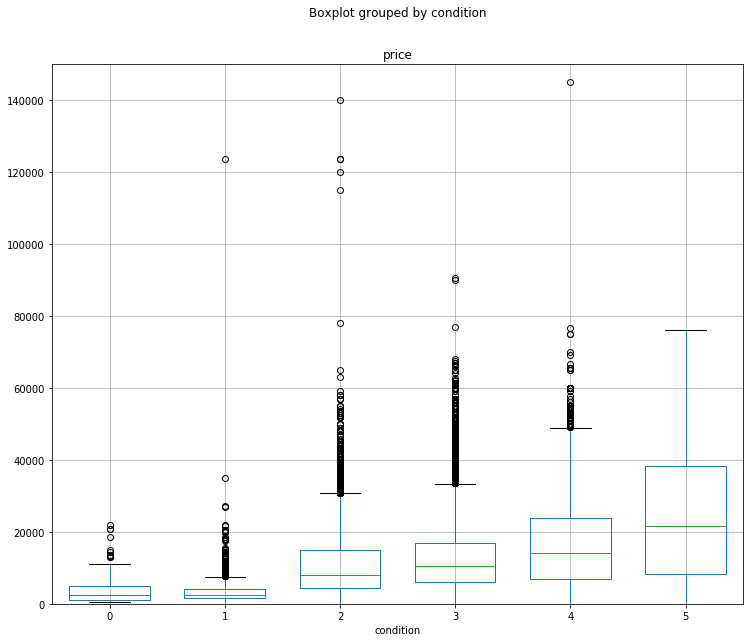

In [69]:
# box plot by condition

data.boxplot(column = 'price', by = 'condition', figsize = (12,10), widths = 0.7)
plt.ylim(0, 150000)
plt.show()

These box plots show an interesting result that we could not have achieved with the simpler scatter plot. The scatter plot showed that the overall prices were not greatly affected by the condition of a car - and for the most part, that does hold true. The medians of each value are fairly close. Even if they do slightly increase as the car's condition is better, they are clustered around the first 20,000 values. However, we can see here that the boxes and their whiskers get significantly larger as the condition increases.

What does this mean? In most simple terms, it means that while the average prices might be similar, the better condition cars have more frequent high prices. For a seller, this means that charging a higher price for a car in better condition is more common.

**Car Type**

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


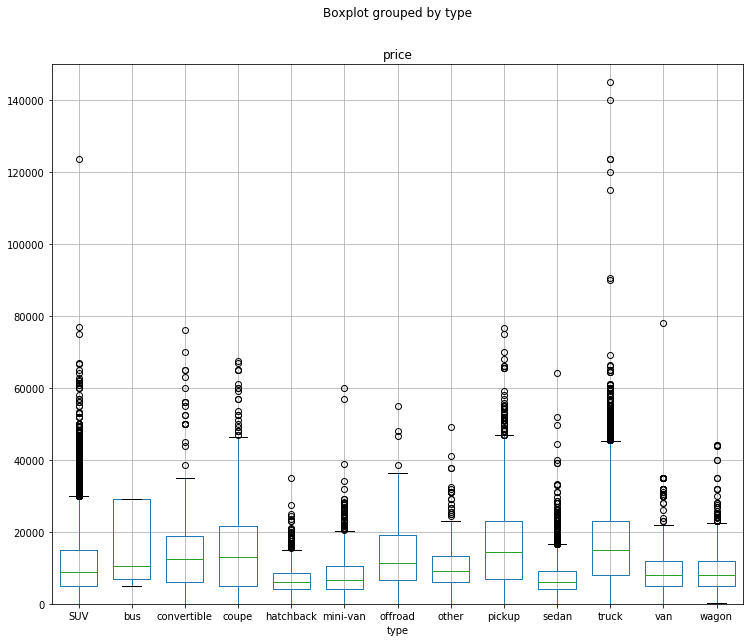

In [70]:
# box plot by type

data.boxplot(column = 'price', by = 'type', figsize = (12,10), widths = 0.7)
plt.ylim(0, 150000)
plt.show()

These box plots show that there are a wide range of prices, depending on the type of car. It lines up very much with what we saw in our bar charts, the whiskers give good insight into what should generally be expected of a price. For instance, we can see that the whisker on the sedan box is just a little higher than the median for the truck box right next to it - that means that the price of an average truck would be almost irrational as the asking price for a sedan.

The bus column has only 24 entries. That is clearly too few to accurately analyze. We will ignore its box for that reason.

Some car types are rather consistent, and others have massive ranges of prices. Hatchbacks are almost all fairly cheap, but coupes frequently are more expensive. Pickups are, around a quarter of the time, as cheap as a sedan but they can also be the most expensive cars overall.

Coupes have the widest range of prices, and pickups, trucks, convertibles, and offroaders are all fairly wide as well. Sedans, hatchbacks, and mini-fans have extremely consistent prices. Vans, wagons, and SUVs are somewhere in the middle of these two extremes. Vans and wagons are also fairly close to the sedan group in consistent prices, SUVs are closer to the coupe group.

Most of the data is roughly symmetrical inside its box - that means of the 25-75% range, the cars are approximately evenly dispersed around the 50% price point. Off-roaders and sedans seem slightly more likely to be on the expensive side.

Overall, what we see here is similar to the analysis we saw in the mean and median bar charts. What we see here, different from there, is the whiskers that basically tell us that most cars could reasonably be as expensive as at least 20,000.

**Transmission Type**

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


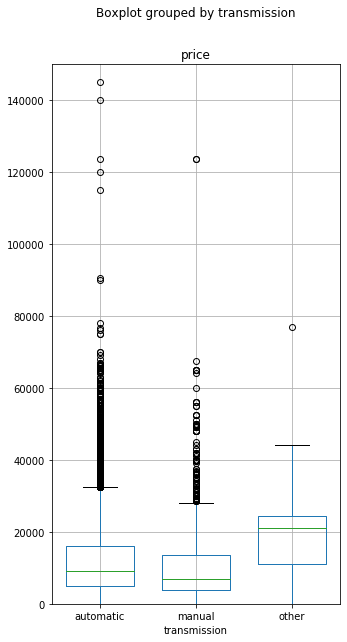

In [71]:
# box plot by transmission

data.boxplot(column = 'price', by = 'transmission', figsize = (5,10), widths = 0.7)
plt.ylim(0, 150000)
plt.show()

We see here that while they are on average a tad more expensive, automatic transmission cars are still around the same price as manual cars. Their medians, boxes, and whiskers are all extremely similar. Thus, it can be concluded that the transmission type mostly does not impact the price.

Unless, that is, it isn't an automatic or manual transmission. The first quartile of 'other' transmission is almost as high as the third quartile of the automatic transmission vehicles. The median is well above either of their boxes. It can be safe to assume that cars with a different type of transmission are more valuable - so, most likely, they do have those different transmissions catered for performance.

**Paint Color**

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


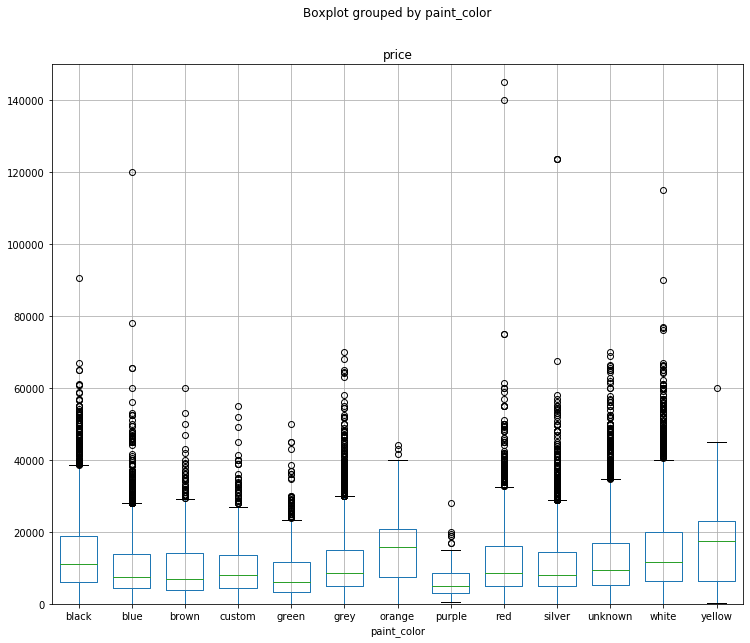

In [72]:
# box plot by color

data.boxplot(column = 'price', by = 'paint_color', figsize = (12,10), widths = 0.7)
plt.ylim(0, 150000)
plt.show()

Here we do see that these paint color prices seem more consistent than the glance we got from the box plot. Their medians are grouped together fairly closely, the primary reason more common colors appear to be more expensive could be explained by them simply having more observations. They have more outliers and larger boxes.

It is very rational to say that not only would all these outliers have an impact on their means, they also could have an effect on the median. Looking closely, all of the boxes in the 'common' colors (white, black, silver, grey, red and blue - as well as unknown) are noticeably larger on the box above the median than they are on the box below the median. What does this mean? Well, it means that there are more values in between 50% and 75% than there are between 25% and 50%. Or, put simply, the data is skewed, with more low-value cars.

## General conclusion

We have been outlining the general conclusions to draw from the data set throughout our analysis, but it would always be a good idea to recap the conclusions.

**Missing Values**

We had missing values to fill in five columns: model_year, cylinders, odometer, paint_color, and is_4wd.

4 wheel drive is a boolean so we simply needed to fill missing values with 0.

Paint color we judged as not plausible to guess, as there were too many variantions of color, so we filled it with 'unknown.'

We filled out the missing values in the car's age by estimating based on the model and their prices.

The cylinders were filled under an assumption that each car model will have the same number of cylinders, only possibly changinng based on the year of the model. Thus, by grouping by model and year, we could determine the number of cylinders.

The odometer was filled by calculating the mileage of other cars based on their age and filling with an estimate.

**Enriching Data**

We changed the date posted to a date object and added a year, month, and day of the week object as well. We used the date and the car's model year to determine the age of the car, and the miles driven on average per year. Afterwards, we turned the categorical "condition" value into a numerical ranking.

**Outliers**

We had outliers in the age and mileage columns and removed them, based on a balance of how many values it would cost us and otherwise mainly used the IQR to get a good estimate. We identified that there were outliers in the price values, and those might be worth looking into, but since the price is the dependent variable, we opted not to remove its outliers.

**Analysis**

We analyzed the data with histograms and scatter plots for numerical data, and bar graphs and box plots for categorical data.

We concluded that age and mileage were the most clearly significant ways to measure the car's price.

Age logarithmically regressed towards the value of 5000, but at a certain point the prices began to increase - this is likely due to cars gaining value as "vintage" collector's items.

The mileage, however, was a clear linear correlation. As a car accumulates more miles, its general price drops.

There did not appear to be a connection between a car's number of cylinders or if it had 4-wheel drive and the price.

The mileage per year also had an interesting looking graph where the data points grew closer together as the annual mileage increased - essentially, meaning prices became more consistent.

We found that better condition cars tended to have higher prices, though on average there was not a significant difference based on price outside of if the car was considered to be in poor condition. However, cars that were in better condition did more commonly have higher prices.

We also found that a car's type had an effect on its price, both on average and in the range of prices. Trucks, pickups, coupes, convertibles, and offroads tend to be higher values; sedans, hatchbacks, and mini-vans tend to be lower values; and vans, SUVs, and wagons are more medium value.

Finally, when examining if a car's paint job had an effect on its price, we determined that while it appeared that more common paint jobs would sell for more, that likely was indepenent of their coloration as this perceived higher value on average was plausibly due to a high number of outliers that had an effect on both the mean and the median.